# PROJECT TEAM ID : "PTID0-CDS-JUL-23-1595"

# PROJECT ID : "PRCP-1028-Skin-Disorder-Prediction"

# Team Member

- Ganesh Kotagundla (kotagundlaganesh@gmail.com)

# PROBLEM STATEMENT

- Task 1: -Prepare a complete data analysis report on the given data.
* Task 2: -Create a predictive model using machine learning techniques to predict the various classes of skin disease.
- Task 3: -Suggestions to the Doctors to identify the skin diseases of the patient at the earliest.

# Import Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from scipy import stats

# Loading Data set

In [2]:
data=pd.read_csv('dataset_35_dermatology (1).csv')
data

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0           2        2                 0        3                   0   
1           3        3                 3        2                   1   
2           2        1                 2        3                   1   
3           2        2                 2        0                   0   
4           2        3                 2        2                   2   
..        ...      ...               ...      ...                 ...   
361         2        1                 1        0                   1   
362         3        2                 1        0                   1   
363         3        2                 2        2                   3   
364         2        1                 3        1                   2   
365         3        2                 2        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                    0                   0                         0   
1                    0                   0                         0   
2                    3                   0                         3   
3                    0                   0                         0   
4                    2                   0                         2   
..                 ...                 ...                       ...   
361                  0                   0                         0   
362                  0                   0                         0   
363                  2                   0                         2   
364                  3                   0                         2   
365                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  ...  \
0                             1                  0  ...   
1                             1                  1  ...   
2                             0                  0  ...   
3                             3                  2  ...   
4                             0                  0  ...   
..                          ...                ...  ...   
361                           0                  0  ...   
362                           0                  0  ...   
363                           0                  0  ...   
364                           0                  0  ...   
365                           3                  3  ...   

     disappearance_of_the_granular_layer  \
0                                      0   
1                                      0   
2                                      0   
3                                      3   
4                                      2   
..                                   ...   
361                                    0   
362                                    1   
363                                    0   
364                                    0   
365                                    2   

     vacuolisation_and_damage_of_basal_layer  spongiosis  \
0                                          0           3   
1                                          0           0   
2                                          2           3   
3                                          0           0   
4                                          3           2   
..                                       ...         ...   
361                                        0           1   
362                                        0           1   
363                                        3           0   
364                                        2           0   
365                                        0           0   

     saw-tooth_appearance_of_retes  follicular_horn_plug  \
0                                0                     0   
1                                0                     0   
2                                2                     0   
3                                0                     0   
4   

# Basic Checks

In [3]:
'''data.head(pd.set_option('display.max_columns',None))'''

"data.head(pd.set_option('display.max_columns',None))"

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

In [5]:
data

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0           2        2                 0        3                   0   
1           3        3                 3        2                   1   
2           2        1                 2        3                   1   
3           2        2                 2        0                   0   
4           2        3                 2        2                   2   
..        ...      ...               ...      ...                 ...   
361         2        1                 1        0                   1   
362         3        2                 1        0                   1   
363         3        2                 2        2                   3   
364         2        1                 3        1                   2   
365         3        2                 2        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                    0                   0                         0   
1                    0                   0                         0   
2                    3                   0                         3   
3                    0                   0                         0   
4                    2                   0                         2   
..                 ...                 ...                       ...   
361                  0                   0                         0   
362                  0                   0                         0   
363                  2                   0                         2   
364                  3                   0                         2   
365                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  ...  \
0                             1                  0  ...   
1                             1                  1  ...   
2                             0                  0  ...   
3                             3                  2  ...   
4                             0                  0  ...   
..                          ...                ...  ...   
361                           0                  0  ...   
362                           0                  0  ...   
363                           0                  0  ...   
364                           0                  0  ...   
365                           3                  3  ...   

     disappearance_of_the_granular_layer  \
0                                      0   
1                                      0   
2                                      0   
3                                      3   
4                                      2   
..                                   ...   
361                                    0   
362                                    1   
363                                    0   
364                                    0   
365                                    2   

     vacuolisation_and_damage_of_basal_layer  spongiosis  \
0                                          0           3   
1                                          0           0   
2                                          2           3   
3                                          0           0   
4                                          3           2   
..                                       ...         ...   
361                                        0           1   
362                                        0           1   
363                                        3           0   
364                                        2           0   
365                                        0           0   

     saw-tooth_appearance_of_retes  follicular_horn_plug  \
0                                0                     0   
1                                0                     0   
2                                2                     0   
3                                0                     0   
4   

In [6]:
data.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')

In [7]:
data.shape

(366, 35)

- Data set has 366 rows and 35 columns

In [8]:
data.head()

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   
2         2        1                 2        3                   1   
3         2        2                 2        0                   0   
4         2        3                 2        2                   2   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                  0                   0                         0   
1                  0                   0                         0   
2                  3                   0                         3   
3                  0                   0                         0   
4                  2                   0                         2   

   knee_and_elbow_involvement  scalp_involvement  ...  \
0                           1                  0  ...   
1                           1                  1  ...   
2                           0                  0  ...   
3                           3                  2  ...   
4                           0                  0  ...   

   disappearance_of_the_granular_layer  \
0                                    0   
1                                    0   
2                                    0   
3                                    3   
4                                    2   

   vacuolisation_and_damage_of_basal_layer  spongiosis  \
0                                        0           3   
1                                        0           0   
2                                        2           3   
3                                        0           0   
4                                        3           2   

   saw-tooth_appearance_of_retes  follicular_horn_plug  \
0                              0                     0   
1                              0                     0   
2                              2                     0   
3                              0                     0   
4                              3                     0   

   perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  \
0                             0                                    1   
1                             0                                    1   
2                             0                                    2   
3                             0                                    3   
4                             0                                    2   

   band-like_infiltrate  Age  class  
0                     0   55      2  
1                     0    8      1  
2                     3   26      3  
3                     0   40      1  
4                     3   45      3  

[5 rows x 35 columns]

In [9]:
data.tail()

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
361         2        1                 1        0                   1   
362         3        2                 1        0                   1   
363         3        2                 2        2                   3   
364         2        1                 3        1                   2   
365         3        2                 2        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
361                  0                   0                         0   
362                  0                   0                         0   
363                  2                   0                         2   
364                  3                   0                         2   
365                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  ...  \
361                           0                  0  ...   
362                           0                  0  ...   
363                           0                  0  ...   
364                           0                  0  ...   
365                           3                  3  ...   

     disappearance_of_the_granular_layer  \
361                                    0   
362                                    1   
363                                    0   
364                                    0   
365                                    2   

     vacuolisation_and_damage_of_basal_layer  spongiosis  \
361                                        0           1   
362                                        0           1   
363                                        3           0   
364                                        2           0   
365                                        0           0   

     saw-tooth_appearance_of_retes  follicular_horn_plug  \
361                              0                     0   
362                              0                     0   
363                              3                     0   
364                              1                     0   
365                              0                     0   

     perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  \
361                             0                                    2   
362                             0                                    2   
363                             0                                    2   
364                             0                                    2   
365                             0                                    3   

     band-like_infiltrate  Age  class  
361                     0   25      4  
362                     0   36      4  
363                     3   28      3  
364                     3   50      3  
365                     0   35      1  

[5 rows x 35 columns]

In [10]:
data.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

- data set has no missing/null values 

In [11]:
data.duplicated().sum()

0

- Dataset has No duplicated values 

# Domain Analysis

- this data involves about the six different types of skin disorders
- they are classifed on the basis of various factors
- The decription of each column is given below:
- erythema: redness of the skin caused by injury or another inflammation-causing condition
- scaling: the formation of scales, especially on the skin.
- definite_borders: clear sharp border separating it from its surrounds
- itching: Caused by irritaion due to drugs
- koebner_phenomenon: the appearance of new skin lesions on previously unaffected skin secondary to trauma.
- polygonal_papules: hiny, flat-topped, and firm on palpation
- follicular_papules: occurs when the inflammatory infiltrate accumulates within the epidermis of the follicle or in the   perifollicular dermis
- oral_mucosal_involvement: the mucous membrane lining or “skin” inside of the mouth, including cheeks and lips.
- knee_and_elbow_involvement: The degree of knee and elbow invovlvement on the effect of skin disease
- scalp_involvement : because of the abundance of desmogleins localized in hair follicles
- family_history: says whether anyone in the family is affected by skin disorders
- melanin_incontinence: Spillage of melanin from the basal keratinocytes into the underlying connective tissue
- eosinophils_in_the_infiltrate : the presence of more than 500 eosinophils/mm3 in peripheral blood
- PNL_infiltrate:
- fibrosis_of_the_papillary_dermis: proliferation of fibroblasts and collagen fibers in the dermis or around hair follicles,  typically oriented parallel to the epidermis
- exocytosis: Exocytosis is a form of active transport and bulk transport in which a cell transports molecules out of the cell
- acanthosis: A skin condition characterised by dark, velvety patches in body folds and creases
- hyperkeratosis : hyperkeratosis occurs as a result of excessive pressure, inflammation or irritation to the skin. When this  happens, the skin responds by producing extra layers of keratin to protect the damaged areas of skin.
- parakeratosis: caused by consumption of excessive calcium.
- clubbing_of_the_rete_ridges: This structure is essential for enhancing the mechanical characteristics of skin and preserving homeostasis
- elongation_of_the_rete_ridges: present with transepidermal pigment cell excretion.
- thinning_of_the_suprapapillary_epidermis: thinning of the granular layer at the tips of the papillae
- spongiform_pustule: scaly, discolored patches of skin with fluid-filled blisters or pustules
- munro_microabcess: a variant of psoriasis
- focal_hypergranulosis: an increased thickness of the stratum granulosum.(a layer which prevents the fluid loss from the body)
- disappearance_of_the_granular_layer: granular layer is the layer which holds the moisture in skin the disspearnec is caused by occurence of skin disease
- vacuolisation_and_damage_of_basal_layer: presence of vacuolisation and damage of skin basal layer.
- spongiosis: presence of intercellular edema.
- saw_tooth_appearance_of_retes: appearance of saw tooth patterns under the skin tissue.
- follicular_horn_plug: presence of follicular horn plugs
- perifollicular_parakeratosis: keratinization characterized by the retention of nuclei in tissues surrounding skin follicles.
- inflammatory_mononuclear_inflitrate: increase in the number of infiltrating mononuclear cells in the skin.
- band_like_infiltrate: basal epidermis in a banded pattern.

# Task 1: -Prepare a complete data analysis report on the given data.

# Exploratry Data Analytics (EDA)

## Univariat analysis

In [12]:
import sweetviz as sv
sd=sv.analyze(data)
sd.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<AxesSubplot:xlabel='class', ylabel='Count'>

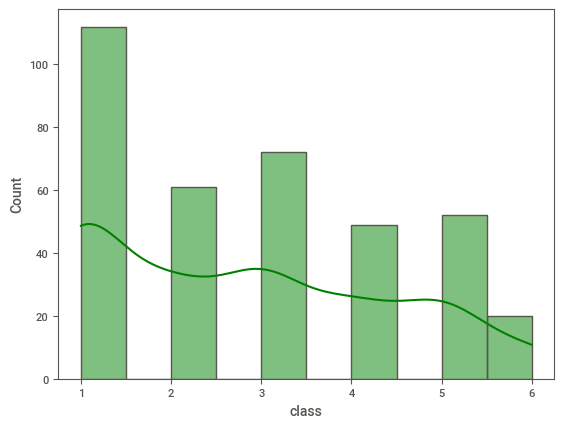

In [13]:
sns.histplot(x='class',data=data,kde=True,color='green')

# Bivarient


<AxesSubplot:xlabel='scaling', ylabel='class'>

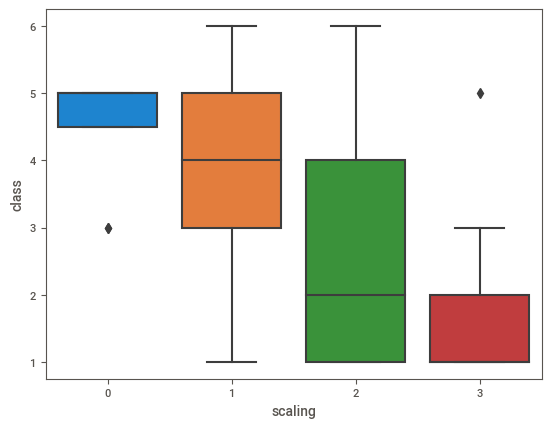

In [14]:
sns.boxplot(x='scaling',y='class',data=data)

<AxesSubplot:xlabel='Age', ylabel='class'>

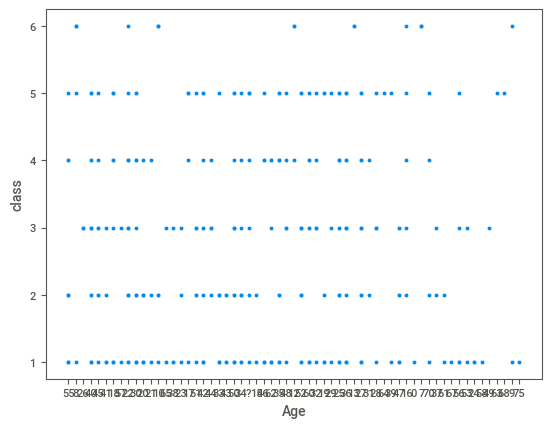

In [15]:
sns.scatterplot(x='Age',y='class',data=data)

# Multivarient

In [16]:
sns.pairplot(data)

In [17]:
data.head(pd.set_option('display.max_rows',None))

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0           2        2                 0        3                   0   
1           3        3                 3        2                   1   
2           2        1                 2        3                   1   
3           2        2                 2        0                   0   
4           2        3                 2        2                   2   
5           2        3                 2        0                   0   
6           2        1                 0        2                   0   
7           2        2                 3        3                   3   
8           2        2                 1        0                   2   
9           2        2                 1        0                   1   
10          3        3                 2        1                   1   
11          2        2                 0        3                   0   
12          3        3                 1        2                   0   
13          2        3                 3        0                   0   
14          2        2                 3        3                   0   
15          1        1                 0        1                   3   
16          2        2                 1        3                   0   
17          3        3                 3        0                   0   
18          2        1                 3        3                   3   
19          1        1                 0        3                   0   
20          2        1                 1        2                   0   
21          3        2                 2        0                   0   
22          2        2                 0        2                   0   
23          2        2                 2        3                   2   
24          2        0                 0        3                   0   
25          2        1                 1        0                   1   
26          1        1                 0        1                   0   
27          1        2                 2        3                   0   
28          3        2                 2        2                   0   
29          1        1                 2        3                   2   
30          3        2                 1        2                   0   
31          3        2                 0        2                   0   
32          2        3                 3        3                   3   
33          2        2                 1        0                   0   
34          2        1                 0        0                   2   
35          2        2                 1        2                   0   
36          2        1                 2        3                   2   
37          2        1                 1        1                   0   
38          2        1                 2        3                   2   
39          3        3                 2        0                   0   
40          1        1                 1        0                   0   
41          1        1                 1        0                   0   
42          3        2                 1        1                   0   
43          2        1                 1        0                   0   
44          0        1                 0        3                   0   
45          2        1                 1        1                   1   
46          2        1                 1        3                   3   
47          2        1                 1        1                   0   
48          1        2                 1        1                   0   
49          2        0                 1        0                   0   
50          3        1                 1        2                   2   
51          1        1                 1        0                   2   
52          2        2                 1        0                   0   
53          3        1                 1        1              

# Data Preprocessing

In [18]:
data.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [19]:
data.duplicated().sum()

0

In [20]:
data.loc[data['Age']=='?'].shape

(8, 35)

In [21]:
data.Age.value_counts()

40    17
50    17
36    16
27    16
22    15
35    14
25    14
55    14
30    13
33    12
60    11
52    11
42    10
18     9
?      8
34     8
20     8
51     7
45     7
62     7
8      7
10     7
19     6
32     6
47     6
46     6
17     5
44     5
16     5
28     5
56     5
48     5
70     4
43     4
7      4
41     4
12     3
29     3
23     3
26     3
38     3
21     3
57     2
9      2
24     2
53     2
61     2
13     2
37     2
65     2
39     2
31     2
15     2
0      1
67     1
64     1
58     1
49     1
63     1
68     1
75     1
Name: Age, dtype: int64

In [22]:
data.Age.mode()

0    40
1    50
Name: Age, dtype: object

In [23]:
data.loc[data['Age']=='?','Age']=45

In [24]:
data.Age.value_counts()

40    17
50    17
36    16
27    16
22    15
35    14
25    14
55    14
30    13
33    12
60    11
52    11
42    10
18     9
45     8
34     8
20     8
51     7
45     7
62     7
8      7
10     7
19     6
32     6
47     6
46     6
17     5
44     5
16     5
28     5
56     5
48     5
70     4
43     4
7      4
41     4
12     3
29     3
23     3
26     3
38     3
21     3
57     2
9      2
24     2
53     2
61     2
13     2
37     2
65     2
39     2
31     2
15     2
0      1
67     1
64     1
58     1
49     1
63     1
68     1
75     1
Name: Age, dtype: int64

In [25]:
data.Age.unique()

array(['55', '8', '26', '40', '45', '41', '18', '57', '22', '30', '20',
       '21', '10', '65', '38', '23', '17', '51', '42', '44', '33', '43',
       '50', '34', 45, '15', '46', '62', '35', '48', '12', '52', '60',
       '32', '19', '29', '25', '36', '13', '27', '31', '28', '64', '39',
       '47', '16', '0', '7', '70', '37', '61', '67', '56', '53', '24',
       '58', '49', '63', '68', '9', '75'], dtype=object)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

# Outliers

In [27]:
data.head(1)

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                  0                   0                         0   

   knee_and_elbow_involvement  scalp_involvement  ...  \
0                           1                  0  ...   

   disappearance_of_the_granular_layer  \
0                                    0   

   vacuolisation_and_damage_of_basal_layer  spongiosis  \
0                                        0           3   

   saw-tooth_appearance_of_retes  follicular_horn_plug  \
0                              0                     0   

   perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  \
0                             0                                    1   

   band-like_infiltrate  Age  class  
0                     0   55      2  

[1 rows x 35 columns]

# erythema

In [28]:
data.erythema.unique()

array([2, 3, 1, 0], dtype=int64)

In [29]:
data.erythema.value_counts()

2    215
3     90
1     57
0      4
Name: erythema, dtype: int64

<AxesSubplot:xlabel='erythema'>

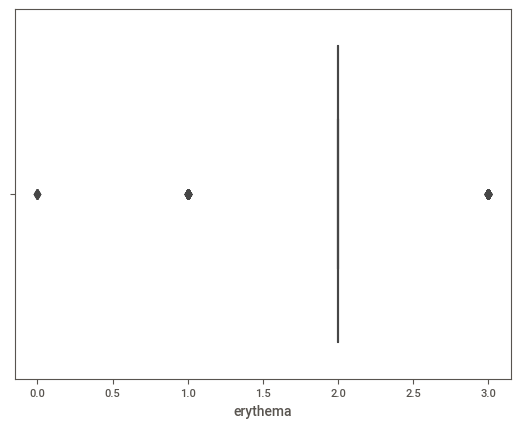

In [30]:
sns.boxplot(x='erythema',data=data)

<AxesSubplot:xlabel='erythema', ylabel='Count'>

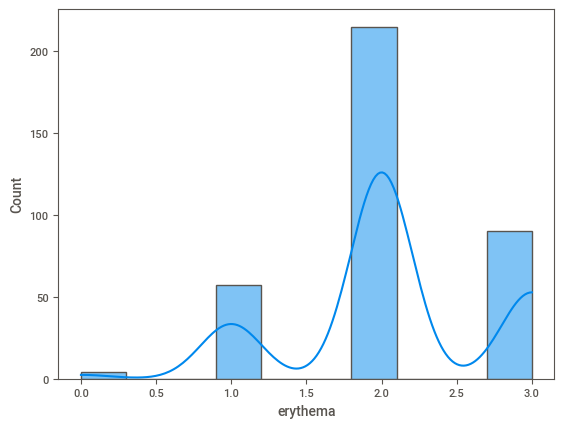

In [31]:
sns.histplot(x='erythema',data=data,kde=True)

In [32]:
iqr=stats.iqr(data.erythema,interpolation='midpoint')
print('iqr : ',iqr)

q1=data.erythema.quantile(0.25)
print('q1 : ',q1)

q3=data.erythema.quantile(0.75)
print('q3 : ',q3)

lowerlimit=q1-1.5*iqr
print('lowerlimit : ',lowerlimit)

upperlimit=q3+1.5*iqr
print('upperlimit : ',upperlimit)

iqr :  0.0
q1 :  2.0
q3 :  2.0
lowerlimit :  2.0
upperlimit :  2.0


In [33]:
data.loc[data['erythema']>lowerlimit]

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
1           3        3                 3        2                   1   
10          3        3                 2        1                   1   
12          3        3                 1        2                   0   
17          3        3                 3        0                   0   
21          3        2                 2        0                   0   
28          3        2                 2        2                   0   
30          3        2                 1        2                   0   
31          3        2                 0        2                   0   
39          3        3                 2        0                   0   
42          3        2                 1        1                   0   
50          3        1                 1        2                   2   
53          3        1                 1        1                   1   
59          3        3                 0        3                   0   
63          3        3                 2        1                   1   
65          3        2                 2        2                   0   
68          3        3                 3        2                   0   
69          3        3                 3        0                   1   
75          3        2                 1        2                   0   
80          3        2                 2        2                   2   
81          3        2                 2        2                   0   
83          3        2                 2        1                   0   
86          3        3                 2        2                   1   
90          3        2                 1        3                   0   
93          3        3                 3        3                   3   
102         3        3                 3        2                   2   
109         3        2                 1        2                   2   
120         3        3                 2        2                   0   
124         3        2                 2        2                   2   
132         3        2                 2        1                   3   
134         3        2                 2        0                   0   
137         3        3                 2        1                   0   
139         3        3                 3        3                   2   
142         3        2                 2        3                   2   
146         3        2                 0        3                   0   
152         3        3                 2        2                   0   
157         3        3                 2        2                   0   
159         3        2                 2        1                   0   
162         3        2                 2        2                   0   
164         3        2                 0        2                   0   
165         3        2                 2        3                   1   
172         3        2                 3        0                   0   
173         3        3                 3        0                   0   
174         3        2                 2        2                   0   
176         3        2                 3        0                   0   
181         3        2                 2        0                   0   
186         3        2                 0        3                   0   
188         3        2                 0        2                   0   
192         3        2                 2        2                   0   
194         3        2                 2        0                   0   
196         3        2                 3        3                   1   
197         3        2                 2        0                   0   
199         3        2                 1        0                   0   
205         3        2                 2        0                   0   
207         3        2                 2        0              

In [34]:
data.loc[data['erythema']<upperlimit]

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
15          1        1                 0        1                   3   
19          1        1                 0        3                   0   
26          1        1                 0        1                   0   
27          1        2                 2        3                   0   
29          1        1                 2        3                   2   
40          1        1                 1        0                   0   
41          1        1                 1        0                   0   
44          0        1                 0        3                   0   
48          1        2                 1        1                   0   
51          1        1                 1        0                   2   
54          0        1                 0        2                   0   
56          1        1                 1        2                   0   
58          1        1                 1        0                   0   
62          1        1                 0        1                   0   
67          1        1                 0        1                   3   
72          1        1                 1        1                   1   
73          1        1                 1        1                   0   
78          0        0                 0        0                   0   
84          1        1                 2        3                   0   
88          0        1                 2        1                   1   
89          1        1                 1        0                   2   
92          1        1                 1        3                   0   
97          1        1                 1        0                   0   
101         1        1                 2        0                   0   
104         1        2                 2        1                   0   
106         1        1                 0        1                   1   
107         1        1                 1        1                   1   
112         1        1                 2        0                   0   
114         1        1                 1        2                   2   
119         1        1                 1        1                   1   
122         1        1                 2        0                   0   
128         1        1                 0        0                   0   
130         1        1                 2        2                   2   
135         1        1                 1        1                   1   
144         1        1                 2        3                   2   
147         1        1                 0        3                   0   
150         1        2                 0        3                   0   
154         1        0                 1        2                   0   
170         1        1                 2        3                   1   
178         1        2                 2        2                   0   
182         1        3                 1        0                   0   
200         1        1                 0        2                   0   
201         1        1                 0        1                   0   
203         1        1                 0        1                   0   
222         1        1                 1        3                   0   
226         1        2                 1        1                   0   
227         1        1                 1        2                   0   
258         1        2                 2        0                   1   
260         1        2                 2        0                   1   
263         1        1                 1        3                   0   
264         1        1                 0        2                   0   
265         1        1                 0        3                   0   
274         1        2                 2        1                   1   
280         1        2                 2        0              

In [35]:
((90+61)/366)*100

41.2568306010929

# Scaling

In [36]:
data.head(2)

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0         2        2                 0        3                   0   
1         3        3                 3        2                   1   

   polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                  0                   0                         0   
1                  0                   0                         0   

   knee_and_elbow_involvement  scalp_involvement  ...  \
0                           1                  0  ...   
1                           1                  1  ...   

   disappearance_of_the_granular_layer  \
0                                    0   
1                                    0   

   vacuolisation_and_damage_of_basal_layer  spongiosis  \
0                                        0           3   
1                                        0           0   

   saw-tooth_appearance_of_retes  follicular_horn_plug  \
0                              0                     0   
1                              0                     0   

   perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  \
0                             0                                    1   
1                             0                                    1   

   band-like_infiltrate  Age  class  
0                     0   55      2  
1                     0    8      1  

[2 rows x 35 columns]

In [37]:
data.scaling.unique()

array([2, 3, 1, 0], dtype=int64)

In [38]:
data.scaling.value_counts()

2    195
1    111
3     52
0      8
Name: scaling, dtype: int64

<AxesSubplot:xlabel='scaling'>

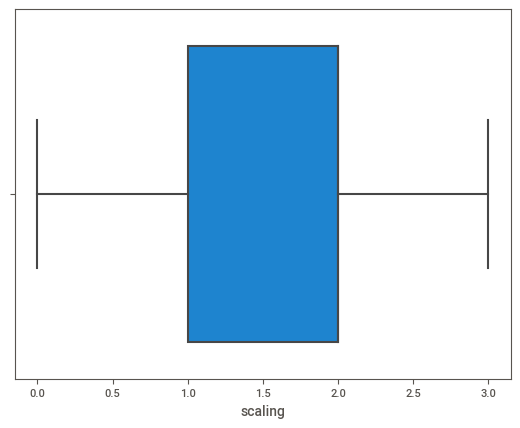

In [39]:
sns.boxplot(x='scaling',data=data)

<AxesSubplot:xlabel='scaling', ylabel='Count'>

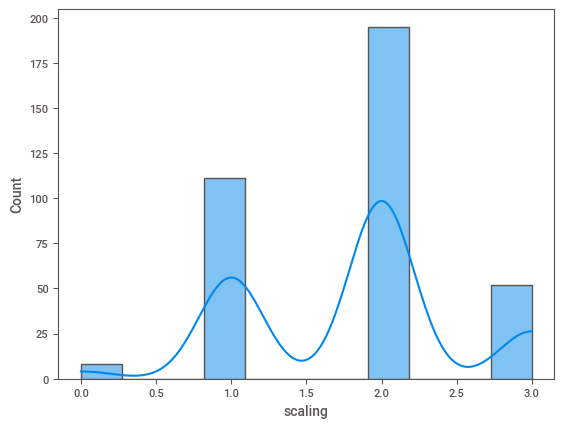

In [40]:
sns.histplot(x='scaling',data=data,kde=True)

In [41]:
iqr=stats.iqr(data.scaling,interpolation='midpoint')
print('iqr : ',iqr)

q1=data.scaling.quantile(0.25)
print('q1 : ',q1)

q3=data.scaling.quantile(0.75)
print('q3 : ',q3)

lowerlimit=q1-1.5*iqr
print('lowerlimit : ',lowerlimit)

upperlimit=q3+1.5*iqr
print('upperlimit : ',upperlimit)

iqr :  1.0
q1 :  1.0
q3 :  2.0
lowerlimit :  -0.5
upperlimit :  3.5


In [42]:
data.loc[data['scaling']<lowerlimit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

In [43]:
data.loc[data['scaling']>upperlimit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

- There is no outliers in scaling 

# definite_borders

In [44]:
data.definite_borders.unique()

array([0, 3, 2, 1], dtype=int64)

In [45]:
data.definite_borders.value_counts()

2    168
1     93
0     59
3     46
Name: definite_borders, dtype: int64

<AxesSubplot:xlabel='definite_borders'>

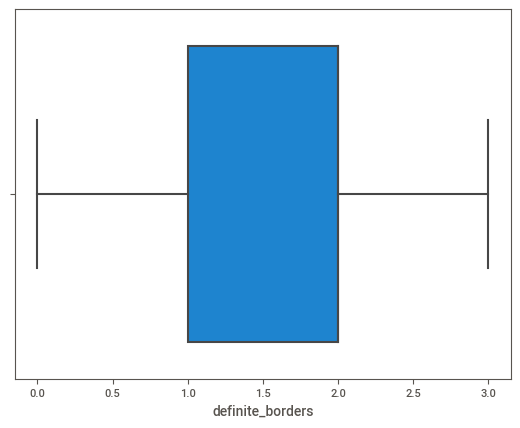

In [46]:
sns.boxplot(x='definite_borders',data=data)

<AxesSubplot:xlabel='definite_borders', ylabel='Count'>

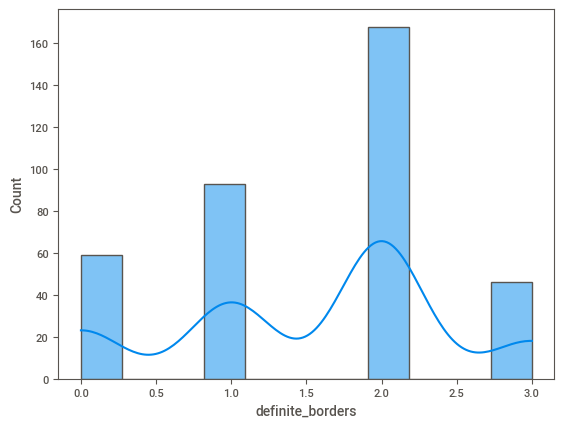

In [47]:
sns.histplot(x='definite_borders',data=data,kde=True)

In [48]:
iqr=stats.iqr(data.definite_borders,interpolation='midpoint')
print('iqr : ',iqr)

q1=data.definite_borders.quantile(0.25)
print('q1 : ',q1)

q3=data.definite_borders.quantile(0.75)
print('q3 : ',q3)

lowerlimit=q1-1.5*iqr
print('lowerlimit : ',lowerlimit)

upperlimit=q3+1.5*iqr
print('upperlimit : ',upperlimit)

iqr :  1.0
q1 :  1.0
q3 :  2.0
lowerlimit :  -0.5
upperlimit :  3.5


In [49]:
data.loc[data['definite_borders']<lowerlimit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

In [50]:
data.loc[data['definite_borders']>upperlimit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

- There is no outlierrs

# itching

In [51]:
data.itching.unique()

array([3, 2, 0, 1], dtype=int64)

In [52]:
data.itching.value_counts()

0    118
2    100
3     76
1     72
Name: itching, dtype: int64

<AxesSubplot:xlabel='itching'>

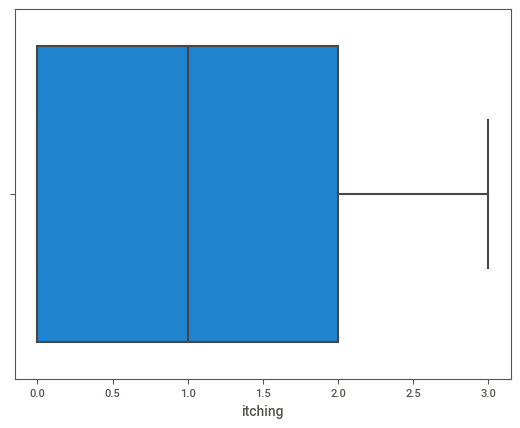

In [53]:
sns.boxplot(x='itching',data=data)

<AxesSubplot:xlabel='itching', ylabel='Count'>

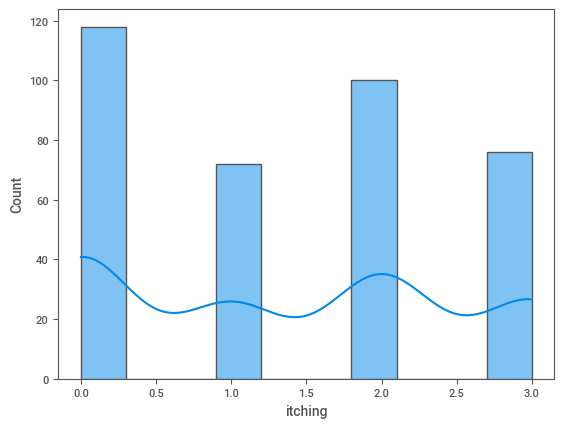

In [54]:
sns.histplot(x='itching',data=data,kde=True)

In [55]:
iqr=stats.iqr(data.itching,interpolation='midpoint')
print('iqr : ',iqr)

q1=data.itching.quantile(0.25)
print('q1 : ',q1)

q3=data.itching.quantile(0.75)
print('q3 : ',q3)

lowerlimit=q1-1.5*iqr
print('lowerlimit : ',lowerlimit)

upperlimit=q3+1.5*iqr
print('upperlimit : ',upperlimit)

iqr :  2.0
q1 :  0.0
q3 :  2.0
lowerlimit :  -3.0
upperlimit :  5.0


In [56]:
data.loc[data['itching']<lowerlimit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

In [57]:
data.loc[data['itching']>upperlimit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

- There is no outliers

# koebner_phenomenon

In [58]:
data.koebner_phenomenon.unique()

array([0, 1, 2, 3], dtype=int64)

In [59]:
data.koebner_phenomenon.value_counts()

0    224
1     70
2     54
3     18
Name: koebner_phenomenon, dtype: int64

<AxesSubplot:xlabel='koebner_phenomenon'>

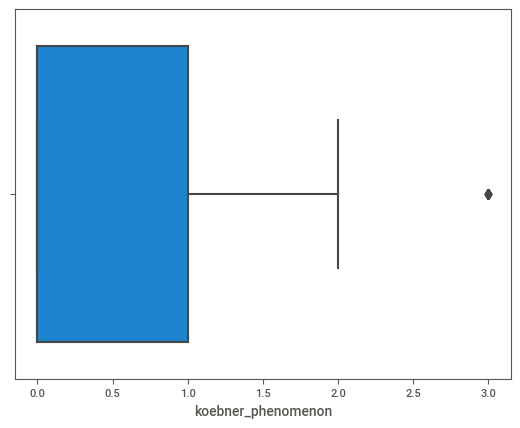

In [60]:
sns.boxplot(x='koebner_phenomenon',data=data)

<AxesSubplot:xlabel='koebner_phenomenon', ylabel='Count'>

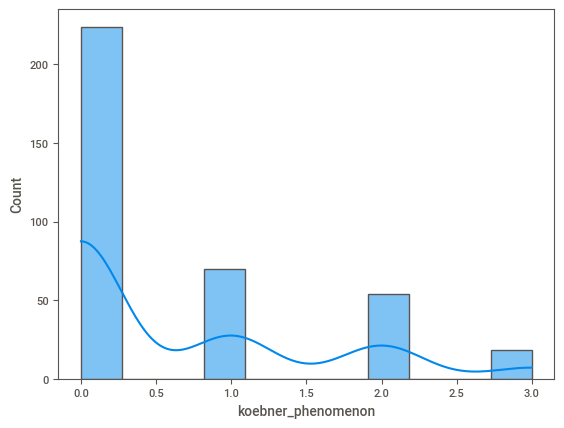

In [61]:
sns.histplot(x='koebner_phenomenon',data=data,kde=True)

In [62]:
iqr=stats.iqr(data.koebner_phenomenon,interpolation='midpoint')
print('iqr : ',iqr)

q1=data.koebner_phenomenon.quantile(0.25)
print('q1 : ',q1)

q3=data.koebner_phenomenon.quantile(0.75)
print('q3 : ',q3)

lowerlimit=q1-1.5*iqr
print('lowerlimit : ',lowerlimit)

upperlimit=q3+1.5*iqr
print('upperlimit : ',upperlimit)

iqr :  1.0
q1 :  0.0
q3 :  1.0
lowerlimit :  -1.5
upperlimit :  2.5


In [63]:
data.loc[data['koebner_phenomenon']<lowerlimit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

In [64]:
data.loc[data['koebner_phenomenon']>upperlimit]

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
7           2        2                 3        3                   3   
15          1        1                 0        1                   3   
18          2        1                 3        3                   3   
32          2        3                 3        3                   3   
46          2        1                 1        3                   3   
67          1        1                 0        1                   3   
85          2        2                 2        3                   3   
93          3        3                 3        3                   3   
113         2        2                 3        2                   3   
123         2        3                 3        3                   3   
127         2        2                 2        2                   3   
132         3        2                 2        1                   3   
138         2        3                 2        3                   3   
215         2        3                 2        3                   3   
217         3        2                 2        3                   3   
250         2        2                 2        2                   3   
315         2        1                 2        3                   3   
363         3        2                 2        2                   3   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
7                    3                   0                         2   
15                   0                   0                         0   
18                   3                   0                         0   
32                   0                   0                         0   
46                   0                   0                         0   
67                   0                   0                         0   
85                   0                   0                         0   
93                   0                   0                         0   
113                  3                   0                         3   
123                  0                   0                         0   
127                  2                   0                         3   
132                  3                   0                         3   
138                  3                   0                         2   
215                  2                   0                         2   
217                  3                   0                         2   
250                  3                   0                         2   
315                  2                   0                         2   
363                  2                   0                         2   

     knee_and_elbow_involvement  scalp_involvement  ...  \
7                             0                  0  ...   
15                            0                  0  ...   
18                            2                  0  ...   
32                            3                  3  ...   
46                            0                  0  ...   
67                            0                  0  ...   
85                            0                  2  ...   
93                            3                  3  ...   
113                           0                  0  ...   
123                           2                  1  ...   
127                           0                  0  ...   
132                           0                  0  ...   
138                           0                  0  ...   
215                           0                  0  ...   
217                           0                  0  ...   
250                           0                  0  ...   
315                           0                  0  ...   
363                           0                  0  ...   

     disappearance_of_the_granular_layer  \
7                                      2   
15                                    

In [65]:
0+18/366*100

4.918032786885246

In [66]:
    data.loc[data['koebner_phenomenon']>upperlimit,'koebner_phenomenon']=data['koebner_phenomenon'].median()

In [67]:
data.loc[data['koebner_phenomenon']>upperlimit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

# polygonal_papules

In [68]:
data.polygonal_papules.unique()

array([0, 3, 2, 1], dtype=int64)

In [69]:
data.polygonal_papules.value_counts()

0    297
2     41
3     27
1      1
Name: polygonal_papules, dtype: int64

<AxesSubplot:xlabel='polygonal_papules'>

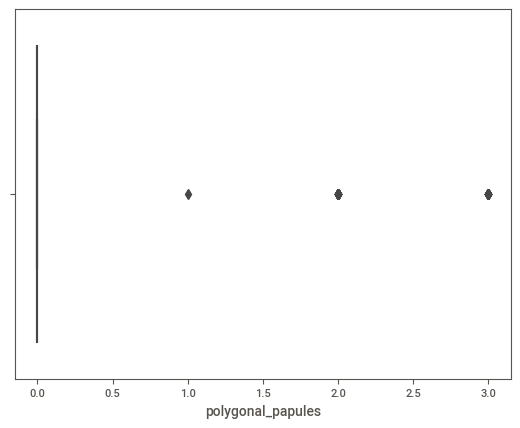

In [70]:
sns.boxplot(x='polygonal_papules',data=data)

<AxesSubplot:xlabel='polygonal_papules', ylabel='Count'>

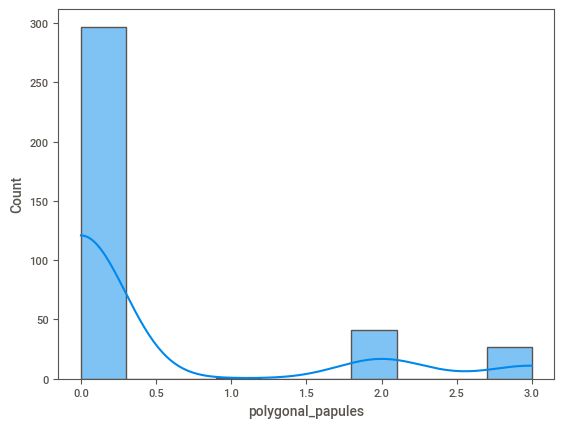

In [71]:
sns.histplot(x='polygonal_papules',data=data,kde=True)

In [72]:
iqr=stats.iqr(data.polygonal_papules,interpolation='midpoint')
print('iqr : ',iqr)

q1=data.polygonal_papules.quantile(0.25)
print('q1 : ',q1)

q3=data.polygonal_papules.quantile(0.75)
print('q3 : ',q3)

lowerlimit=q1-1.5*iqr
print('lowerlimit : ',lowerlimit)

upperlimit=q3+1.5*iqr
print('upperlimit : ',upperlimit)

iqr :  0.0
q1 :  0.0
q3 :  0.0
lowerlimit :  0.0
upperlimit :  0.0


In [73]:
data.loc[data['polygonal_papules']<lowerlimit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

In [74]:
data.loc[data['polygonal_papules']>upperlimit]

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
2           2        1                 2        3                   1   
4           2        3                 2        2                   2   
7           2        2                 3        3                   0   
14          2        2                 3        3                   0   
18          2        1                 3        3                   0   
23          2        2                 2        3                   2   
29          1        1                 2        3                   2   
36          2        1                 2        3                   2   
38          2        1                 2        3                   2   
45          2        1                 1        1                   1   
49          2        0                 1        0                   0   
50          3        1                 1        2                   2   
57          2        1                 1        3                   0   
65          3        2                 2        2                   0   
94          2        1                 1        3                   2   
108         2        2                 3        2                   1   
111         2        2                 2        3                   2   
113         2        2                 3        2                   0   
114         1        1                 1        2                   2   
117         2        2                 3        2                   2   
127         2        2                 2        2                   0   
132         3        2                 2        1                   0   
138         2        3                 2        3                   0   
143         2        1                 1        3                   2   
144         1        1                 2        3                   2   
145         2        2                 3        3                   1   
155         2        1                 1        1                   0   
157         3        3                 2        2                   0   
162         3        2                 2        2                   0   
167         2        2                 3        3                   1   
169         2        2                 3        3                   1   
170         1        1                 2        3                   1   
174         3        2                 2        2                   0   
178         1        2                 2        2                   0   
179         2        2                 2        2                   0   
190         2        1                 2        3                   1   
191         2        3                 3        3                   0   
192         3        2                 2        2                   0   
196         3        2                 3        3                   1   
212         2        2                 2        3                   1   
213         2        2                 2        2                   1   
214         3        2                 3        2                   2   
215         2        3                 2        3                   0   
216         2        2                 3        2                   2   
217         3        2                 2        3                   0   
249         2        1                 1        2                   2   
250         2        2                 2        2                   0   
251         2        2                 2        2                   1   
252         2        2                 2        2                   1   
253         2        1                 2        2                   0   
254         3        1                 2        3                   0   
255         2        1                 2        2                   0   
287         2        1                 2        1                   0   
288         2        2                 3        1              

In [75]:
0+69/366*100

18.852459016393443

- feature contains 18.852459016393443 outlier

# follicular_papules

In [76]:
data.follicular_papules.unique()

array([0, 3, 1, 2], dtype=int64)

In [77]:
data.follicular_papules.value_counts()

0    333
2     16
1     11
3      6
Name: follicular_papules, dtype: int64

<AxesSubplot:xlabel='follicular_papules'>

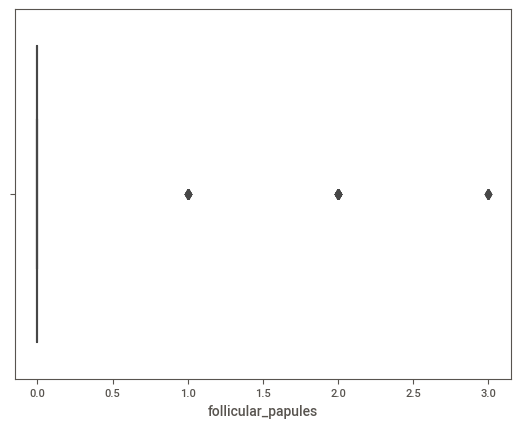

In [78]:
sns.boxplot(x='follicular_papules',data=data)

<AxesSubplot:xlabel='follicular_papules', ylabel='Count'>

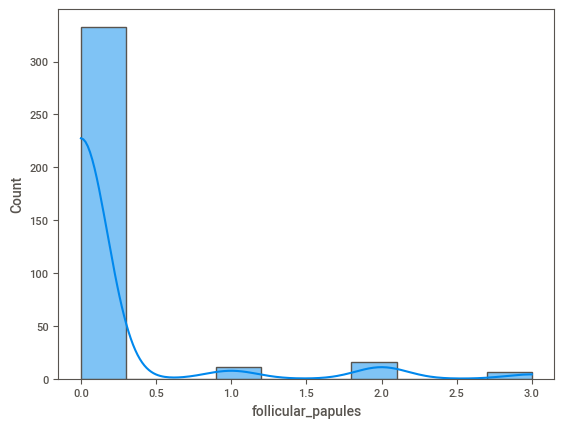

In [79]:
sns.histplot(x='follicular_papules',data=data,kde=True)

In [80]:
iqr=stats.iqr(data.follicular_papules,interpolation='midpoint')
print('iqr : ',iqr)

q1=data.follicular_papules.quantile(0.25)
print('q1 : ',q1)

q3=data.follicular_papules.quantile(0.75)
print('q3 : ',q3)

lowerlimit=q1-1.5*iqr
print('lowerlimit : ',lowerlimit)

upperlimit=q3+1.5*iqr
print('upperlimit : ',upperlimit)

iqr :  0.0
q1 :  0.0
q3 :  0.0
lowerlimit :  0.0
upperlimit :  0.0


In [81]:
data.loc[data['follicular_papules']<lowerlimit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

In [82]:
data.loc[data['follicular_papules']>upperlimit]

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
20          2        1                 1        2                   0   
26          1        1                 0        1                   0   
40          1        1                 1        0                   0   
47          2        1                 1        1                   0   
60          2        2                 1        1                   0   
71          2        1                 2        0                   0   
88          0        1                 2        1                   1   
92          1        1                 1        3                   0   
99          2        2                 1        0                   0   
115         2        2                 2        3                   0   
121         2        2                 2        1                   0   
122         1        1                 2        0                   0   
126         2        2                 2        0                   0   
130         1        1                 2        2                   2   
135         1        1                 1        1                   1   
163         2        2                 0        0                   0   
184         2        2                 1        0                   0   
200         1        1                 0        2                   0   
201         1        1                 0        1                   0   
202         2        2                 0        2                   0   
203         1        1                 0        1                   0   
204         2        2                 0        2                   0   
239         2        2                 2        1                   0   
240         3        2                 0        0                   0   
266         2        2                 1        1                   0   
267         3        2                 0        1                   0   
268         2        2                 1        1                   0   
296         2        1                 1        3                   0   
343         2        2                 2        0                   0   
344         2        2                 1        0                   0   
347         2        2                 0        1                   0   
348         3        2                 2        0                   0   
349         2        2                 1        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
20                   0                   3                         0   
26                   0                   3                         0   
40                   0                   1                         0   
47                   0                   2                         0   
60                   0                   1                         0   
71                   0                   3                         0   
88                   0                   1                         0   
92                   0                   1                         0   
99                   0                   2                         0   
115                  0                   1                         0   
121                  0                   2                         0   
122                  0                   3                         0   
126                  0                   2                         0   
130                  0                   2                         0   
135                  0                   1                         0   
163                  0                   2                         0   
184                  0                   3                         0   
200                  0                   1                         0   
201                  0                   2                         0   
202                  0                   1                         0   
203       

In [83]:
0+33/366*100

9.01639344262295

- feature contains 9.01639344262295 outlier

# oral_mucosal_involvement

In [84]:
data.oral_mucosal_involvement.unique()

array([0, 3, 2, 1], dtype=int64)

In [85]:
data.oral_mucosal_involvement.value_counts()

0    299
2     45
3     13
1      9
Name: oral_mucosal_involvement, dtype: int64

<AxesSubplot:xlabel='oral_mucosal_involvement'>

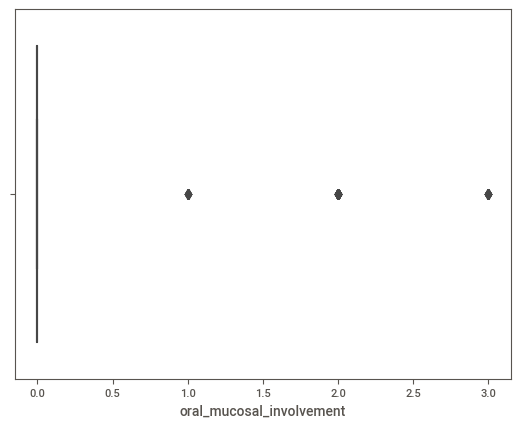

In [86]:
sns.boxplot(x='oral_mucosal_involvement',data=data)

<AxesSubplot:xlabel='oral_mucosal_involvement', ylabel='Count'>

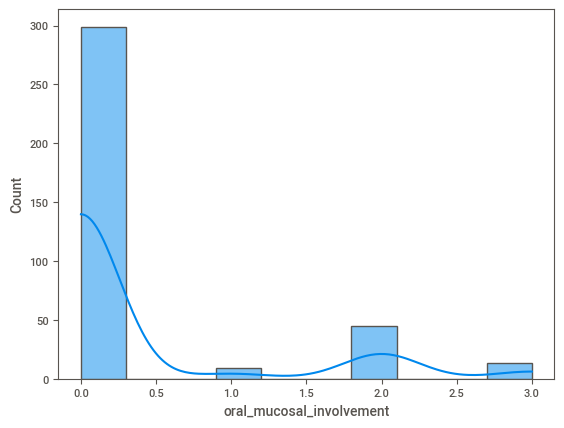

In [87]:
sns.histplot(x='oral_mucosal_involvement',data=data,kde=True)

In [88]:
iqr=stats.iqr(data.oral_mucosal_involvement,interpolation='midpoint')
print('iqr : ',iqr)

q1=data.oral_mucosal_involvement.quantile(0.25)
print('q1 : ',q1)

q3=data.oral_mucosal_involvement.quantile(0.75)
print('q3 : ',q3)

lowerlimit=q1-1.5*iqr
print('lowerlimit : ',lowerlimit)

upperlimit=q3+1.5*iqr
print('upperlimit : ',upperlimit)

iqr :  0.0
q1 :  0.0
q3 :  0.0
lowerlimit :  0.0
upperlimit :  0.0


In [89]:
data.loc[data['oral_mucosal_involvement']<lowerlimit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

In [90]:
data.loc[data['oral_mucosal_involvement']>upperlimit]

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
2           2        1                 2        3                   1   
4           2        3                 2        2                   2   
7           2        2                 3        3                   0   
14          2        2                 3        3                   0   
23          2        2                 2        3                   2   
29          1        1                 2        3                   2   
36          2        1                 2        3                   2   
38          2        1                 2        3                   2   
45          2        1                 1        1                   1   
49          2        0                 1        0                   0   
57          2        1                 1        3                   0   
65          3        2                 2        2                   0   
72          1        1                 1        1                   1   
78          0        0                 0        0                   0   
87          2        1                 2        1                   1   
94          2        1                 1        3                   2   
108         2        2                 3        2                   1   
111         2        2                 2        3                   2   
113         2        2                 3        2                   0   
114         1        1                 1        2                   2   
117         2        2                 3        2                   2   
127         2        2                 2        2                   0   
132         3        2                 2        1                   0   
138         2        3                 2        3                   0   
143         2        1                 1        3                   2   
144         1        1                 2        3                   2   
145         2        2                 3        3                   1   
155         2        1                 1        1                   0   
157         3        3                 2        2                   0   
162         3        2                 2        2                   0   
167         2        2                 3        3                   1   
169         2        2                 3        3                   1   
170         1        1                 2        3                   1   
174         3        2                 2        2                   0   
178         1        2                 2        2                   0   
179         2        2                 2        2                   0   
190         2        1                 2        3                   1   
191         2        3                 3        3                   0   
196         3        2                 3        3                   1   
212         2        2                 2        3                   1   
213         2        2                 2        2                   1   
214         3        2                 3        2                   2   
215         2        3                 2        3                   0   
216         2        2                 3        2                   2   
217         3        2                 2        3                   0   
249         2        1                 1        2                   2   
250         2        2                 2        2                   0   
251         2        2                 2        2                   1   
252         2        2                 2        2                   1   
253         2        1                 2        2                   0   
287         2        1                 2        1                   0   
288         2        2                 3        1                   0   
289         3        2                 2        1                   0   
290         2        2                 3        2              

In [91]:
0+67/366*100

18.30601092896175

- Feature contains 18.30601092896175 outlier

# knee_and_elbow_involvement

In [92]:
data.knee_and_elbow_involvement.unique()

array([1, 0, 3, 2], dtype=int64)

In [93]:
data.knee_and_elbow_involvement.value_counts()

0    251
2     64
1     28
3     23
Name: knee_and_elbow_involvement, dtype: int64

<AxesSubplot:xlabel='knee_and_elbow_involvement'>

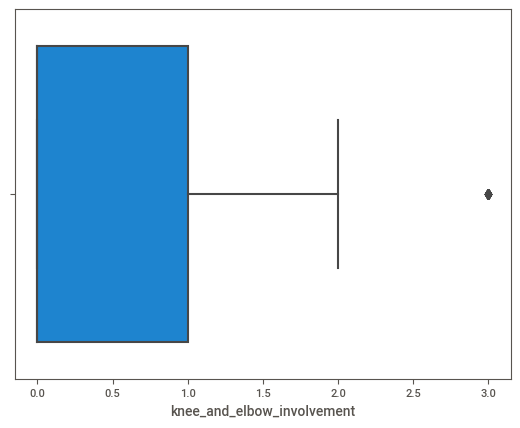

In [94]:
sns.boxplot(x='knee_and_elbow_involvement',data=data)

<AxesSubplot:xlabel='knee_and_elbow_involvement', ylabel='Count'>

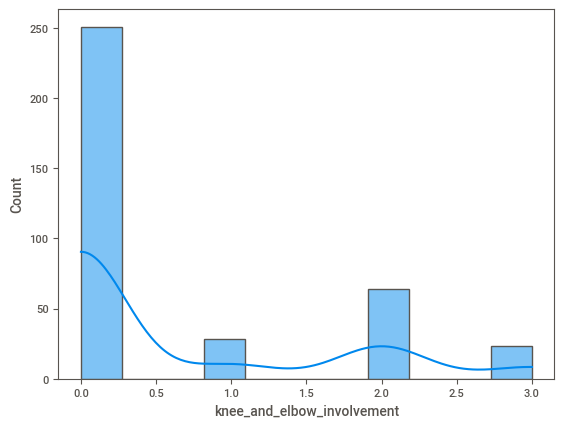

In [95]:
sns.histplot(x='knee_and_elbow_involvement',data=data,kde=True)

In [96]:
iqr=stats.iqr(data.knee_and_elbow_involvement,interpolation='midpoint')
print('iqr : ',iqr)

q1=data.knee_and_elbow_involvement.quantile(0.25)
print('q1 : ',q1)

q3=data.knee_and_elbow_involvement.quantile(0.75)
print('q3 : ',q3)

lowerlimit=q1-1.5*iqr
print('lowerlimit : ',lowerlimit)

upperlimit=q3+1.5*iqr
print('upperlimit : ',upperlimit)

iqr :  1.0
q1 :  0.0
q3 :  1.0
lowerlimit :  -1.5
upperlimit :  2.5


In [97]:
data.loc[data['knee_and_elbow_involvement']<lowerlimit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

In [98]:
data.loc[data['knee_and_elbow_involvement']>upperlimit]

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
3           2        2                 2        0                   0   
17          3        3                 3        0                   0   
32          2        3                 3        3                   0   
47          2        1                 1        1                   0   
71          2        1                 2        0                   0   
93          3        3                 3        3                   0   
110         2        2                 2        3                   2   
122         1        1                 2        0                   0   
172         3        2                 3        0                   0   
175         2        2                 2        0                   0   
189         2        2                 2        0                   0   
194         3        2                 2        0                   0   
207         3        2                 2        0                   2   
209         2        3                 2        0                   0   
211         2        3                 2        0                   0   
244         2        1                 2        0                   0   
273         2        2                 3        1                   0   
292         2        3                 2        0                   1   
320         2        2                 3        0                   0   
324         2        2                 3        0                   1   
355         2        3                 2        3                   2   
356         2        2                 2        2                   2   
365         3        2                 2        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
3                    0                   0                         0   
17                   0                   0                         0   
32                   0                   0                         0   
47                   0                   2                         0   
71                   0                   3                         0   
93                   0                   0                         0   
110                  0                   0                         0   
122                  0                   3                         0   
172                  0                   0                         0   
175                  0                   0                         0   
189                  0                   0                         0   
194                  0                   0                         0   
207                  0                   0                         0   
209                  0                   0                         0   
211                  0                   0                         0   
244                  0                   0                         0   
273                  0                   0                         0   
292                  0                   0                         0   
320                  0                   0                         0   
324                  0                   0                         0   
355                  0                   0                         0   
356                  0                   0                         0   
365                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  ...  \
3                             3                  2  ...   
17                            3                  3  ...   
32                            3                  3  ...   
47                            3                  2  ...   
71                            3                  0  ...   
93                            3                  3  ...   
110                           3                  3  ...   
122                           3                  0 

In [99]:
0+23/366*100

6.284153005464481

-feature contains 6.284153005464481 outlier

# scalp_involvement	

In [100]:
data.scalp_involvement.unique()

array([0, 1, 2, 3], dtype=int64)

In [101]:
data.scalp_involvement.value_counts()

0    264
2     56
1     30
3     16
Name: scalp_involvement, dtype: int64

<AxesSubplot:xlabel='scalp_involvement'>

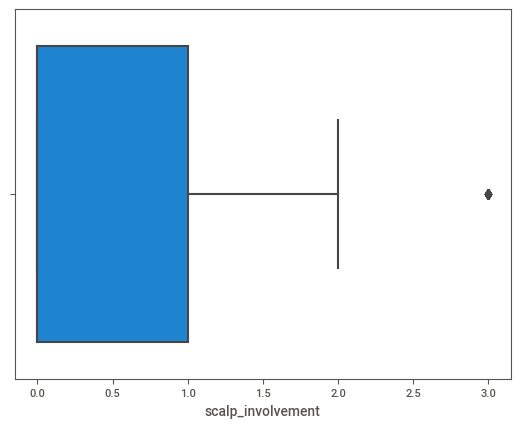

In [102]:
sns.boxplot(x='scalp_involvement',data=data)

<AxesSubplot:xlabel='scalp_involvement', ylabel='Count'>

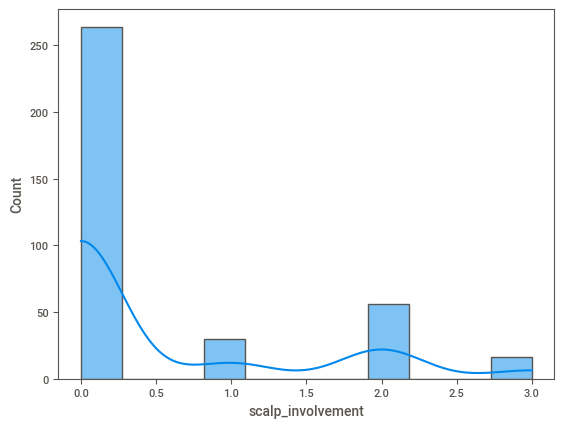

In [103]:
sns.histplot(x='scalp_involvement',data=data,kde=True)

In [104]:
iqr=stats.iqr(data.scalp_involvement,interpolation='midpoint')
print('iqr : ',iqr)

q1=data.scalp_involvement.quantile(0.25)
print('q1 : ',q1)

q3=data.scalp_involvement.quantile(0.75)
print('q3 : ',q3)

lowerlimit=q1-1.5*iqr
print('lowerlimit : ',lowerlimit)

upperlimit=q3+1.5*iqr
print('upperlimit : ',upperlimit)

iqr :  1.0
q1 :  0.0
q3 :  1.0
lowerlimit :  -1.5
upperlimit :  2.5


In [105]:
data.loc[data['scalp_involvement']<lowerlimit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

In [106]:
data.loc[data['scalp_involvement']>upperlimit]

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
17          3        3                 3        0                   0   
32          2        3                 3        3                   0   
88          0        1                 2        1                   1   
93          3        3                 3        3                   0   
110         2        2                 2        3                   2   
124         3        2                 2        2                   2   
135         1        1                 1        1                   1   
194         3        2                 2        0                   0   
206         2        3                 2        0                   1   
208         2        3                 2        0                   0   
245         3        3                 3        0                   0   
246         2        2                 2        0                   0   
304         3        1                 2        1                   0   
351         2        2                 2        3                   2   
352         3        2                 2        3                   2   
365         3        2                 2        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
17                   0                   0                         0   
32                   0                   0                         0   
88                   0                   1                         0   
93                   0                   0                         0   
110                  0                   0                         0   
124                  0                   0                         0   
135                  0                   1                         0   
194                  0                   0                         0   
206                  0                   0                         0   
208                  0                   0                         0   
245                  0                   0                         0   
246                  0                   0                         0   
304                  0                   0                         0   
351                  0                   0                         0   
352                  0                   0                         0   
365                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  ...  \
17                            3                  3  ...   
32                            3                  3  ...   
88                            2                  3  ...   
93                            3                  3  ...   
110                           3                  3  ...   
124                           0                  3  ...   
135                           2                  3  ...   
194                           3                  3  ...   
206                           2                  3  ...   
208                           2                  3  ...   
245                           2                  3  ...   
246                           2                  3  ...   
304                           2                  3  ...   
351                           2                  3  ...   
352                           2                  3  ...   
365                           3                  3  ...   

     disappearance_of_the_granular_layer  \
17                                     3   
32                                     0   
88                                     0   
93                                     1   
110                                    1   
124                                    0   
135                                    0   
194                                    3   
206                                    0   
208                                    0   
245                                    3   
246   

In [107]:
0+16/366*100

4.371584699453552

In [108]:
 data.loc[data['scalp_involvement']>upperlimit,'scalp_involvement']=data['scalp_involvement'].median()

In [109]:
data.loc[data['scalp_involvement']>upperlimit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

- There is no outlier

# family_history

In [110]:
data.family_history.unique()

array([0, 1], dtype=int64)

In [111]:
data.family_history.value_counts()

0    320
1     46
Name: family_history, dtype: int64

<AxesSubplot:xlabel='family_history'>

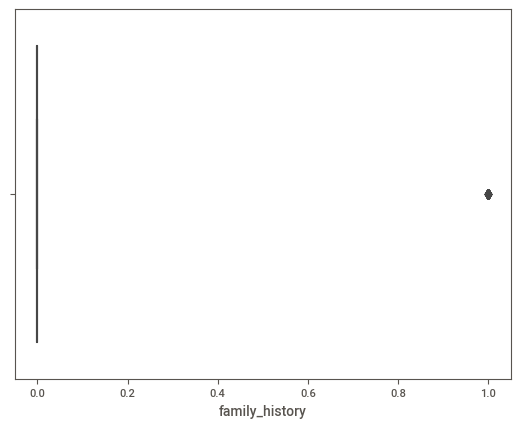

In [112]:
sns.boxplot(x='family_history',data=data)

<AxesSubplot:xlabel='family_history', ylabel='Count'>

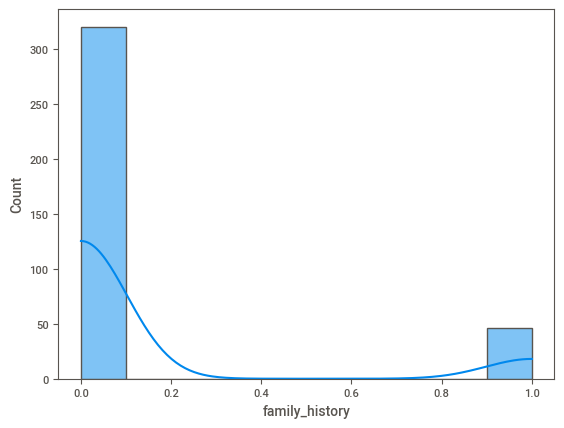

In [113]:
sns.histplot(x='family_history',data=data,kde=True)

In [114]:
iqr=stats.iqr(data.family_history,interpolation='midpoint')
print('iqr : ',iqr)

q1=data.family_history.quantile(0.25)
print('q1 : ',q1)

q3=data.family_history.quantile(0.75)
print('q3 : ',q3)

lowerlimit=q1-1.5*iqr
print('lowerlimit : ',lowerlimit)

upperlimit=q3+1.5*iqr
print('upperlimit : ',upperlimit)

iqr :  0.0
q1 :  0.0
q3 :  0.0
lowerlimit :  0.0
upperlimit :  0.0


In [115]:
data.loc[data['family_history']<lowerlimit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

In [116]:
data.loc[data['family_history']>upperlimit]

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
1           3        3                 3        2                   1   
10          3        3                 2        1                   1   
13          2        3                 3        0                   0   
17          3        3                 3        0                   0   
33          2        2                 1        0                   0   
36          2        1                 2        3                   2   
39          3        3                 2        0                   0   
53          3        1                 1        1                   1   
60          2        2                 1        1                   0   
61          2        1                 1        0                   0   
63          3        3                 2        1                   1   
90          3        2                 1        3                   0   
93          3        3                 3        3                   0   
99          2        2                 1        0                   0   
105         2        2                 2        2                   2   
122         1        1                 2        0                   0   
151         2        3                 2        1                   0   
163         2        2                 0        0                   0   
165         3        2                 2        3                   1   
184         2        2                 1        0                   0   
188         3        2                 0        2                   0   
193         2        2                 2        0                   0   
194         3        2                 2        0                   0   
205         3        2                 2        0                   0   
233         2        2                 2        1                   1   
235         2        2                 2        1                   0   
236         3        2                 3        2                   0   
237         2        2                 1        1                   0   
239         2        2                 2        1                   0   
241         2        2                 2        3                   0   
243         2        2                 2        2                   0   
244         2        1                 2        0                   0   
248         3        2                 2        0                   0   
266         2        2                 1        1                   0   
267         3        2                 0        1                   0   
272         3        3                 2        0                   1   
273         2        2                 3        1                   0   
274         1        2                 2        1                   1   
278         3        2                 2        1                   0   
292         2        3                 2        0                   1   
310         3        2                 2        0                   0   
323         2        3                 3        0                   0   
343         2        2                 2        0                   0   
348         3        2                 2        0                   0   
351         2        2                 2        3                   2   
356         2        2                 2        2                   2   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
1                    0                   0                         0   
10                   0                   0                         0   
13                   0                   0                         0   
17                   0                   0                         0   
33                   0                   0                         0   
36                   3                   0                         2   
39                   0                   0                         0 

In [117]:
0+46/366*100

12.568306010928962

-feature contains 12.568306010928962 outlier

# melanin_incontinence

In [118]:
data.melanin_incontinence.unique()

array([0, 1, 2, 3], dtype=int64)

In [119]:
data.melanin_incontinence.value_counts()

0    296
2     46
3     16
1      8
Name: melanin_incontinence, dtype: int64

<AxesSubplot:xlabel='melanin_incontinence'>

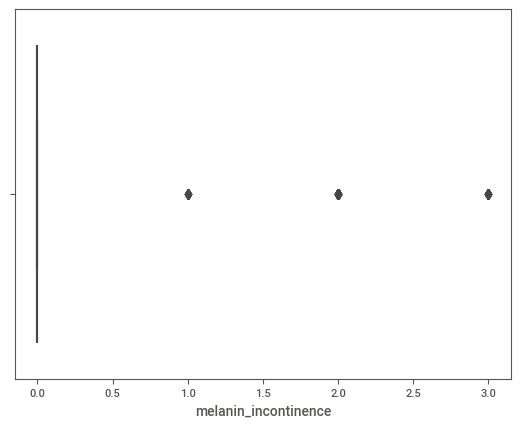

In [120]:
sns.boxplot(x='melanin_incontinence',data=data)

<AxesSubplot:xlabel='melanin_incontinence', ylabel='Count'>

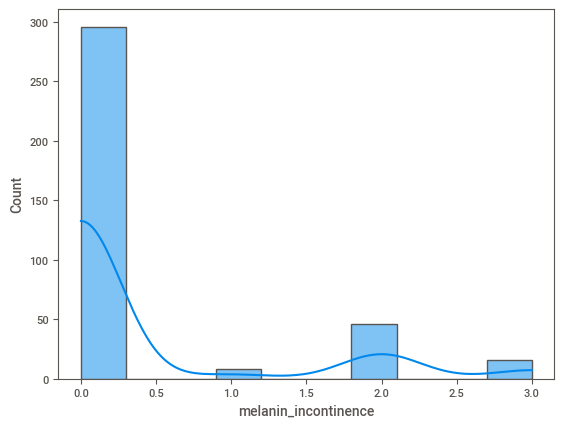

In [121]:
sns.histplot(x='melanin_incontinence',data=data,kde=True)

In [122]:
iqr=stats.iqr(data.melanin_incontinence,interpolation='midpoint')
print('iqr : ',iqr)

q1=data.melanin_incontinence.quantile(0.25)
print('q1 : ',q1)

q3=data.melanin_incontinence.quantile(0.75)
print('q3 : ',q3)

lowerlimit=q1-1.5*iqr
print('lowerlimit : ',lowerlimit)

upperlimit=q3+1.5*iqr
print('upperlimit : ',upperlimit)

iqr :  0.0
q1 :  0.0
q3 :  0.0
lowerlimit :  0.0
upperlimit :  0.0


In [123]:
data.loc[data['melanin_incontinence']<lowerlimit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

In [124]:
data.loc[data['melanin_incontinence']>upperlimit]

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
2           2        1                 2        3                   1   
4           2        3                 2        2                   2   
7           2        2                 3        3                   0   
14          2        2                 3        3                   0   
18          2        1                 3        3                   0   
23          2        2                 2        3                   2   
29          1        1                 2        3                   2   
36          2        1                 2        3                   2   
45          2        1                 1        1                   1   
49          2        0                 1        0                   0   
50          3        1                 1        2                   2   
57          2        1                 1        3                   0   
65          3        2                 2        2                   0   
72          1        1                 1        1                   1   
78          0        0                 0        0                   0   
87          2        1                 2        1                   1   
94          2        1                 1        3                   2   
108         2        2                 3        2                   1   
111         2        2                 2        3                   2   
113         2        2                 3        2                   0   
114         1        1                 1        2                   2   
117         2        2                 3        2                   2   
127         2        2                 2        2                   0   
132         3        2                 2        1                   0   
138         2        3                 2        3                   0   
144         1        1                 2        3                   2   
145         2        2                 3        3                   1   
155         2        1                 1        1                   0   
157         3        3                 2        2                   0   
162         3        2                 2        2                   0   
167         2        2                 3        3                   1   
169         2        2                 3        3                   1   
170         1        1                 2        3                   1   
174         3        2                 2        2                   0   
178         1        2                 2        2                   0   
179         2        2                 2        2                   0   
190         2        1                 2        3                   1   
191         2        3                 3        3                   0   
192         3        2                 2        2                   0   
196         3        2                 3        3                   1   
212         2        2                 2        3                   1   
213         2        2                 2        2                   1   
214         3        2                 3        2                   2   
215         2        3                 2        3                   0   
216         2        2                 3        2                   2   
217         3        2                 2        3                   0   
249         2        1                 1        2                   2   
250         2        2                 2        2                   0   
251         2        2                 2        2                   1   
252         2        2                 2        2                   1   
253         2        1                 2        2                   0   
254         3        1                 2        3                   0   
255         2        1                 2        2                   0   
287         2        1                 2        1              

In [125]:
0+70/366*100

19.12568306010929

-Feature contains 19.12568306010929 outlier

# eosinophils_in_the_infiltrate

In [126]:
data.eosinophils_in_the_infiltrate.unique()

array([0, 2, 1], dtype=int64)

In [127]:
data.eosinophils_in_the_infiltrate.value_counts()

0    324
1     33
2      9
Name: eosinophils_in_the_infiltrate, dtype: int64

<AxesSubplot:xlabel='eosinophils_in_the_infiltrate'>

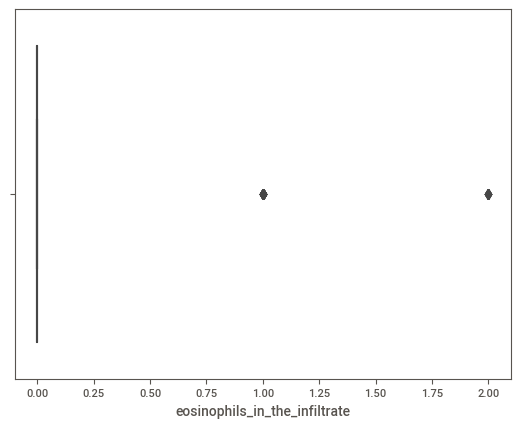

In [128]:
sns.boxplot(x='eosinophils_in_the_infiltrate',data=data)

<AxesSubplot:xlabel='eosinophils_in_the_infiltrate', ylabel='Count'>

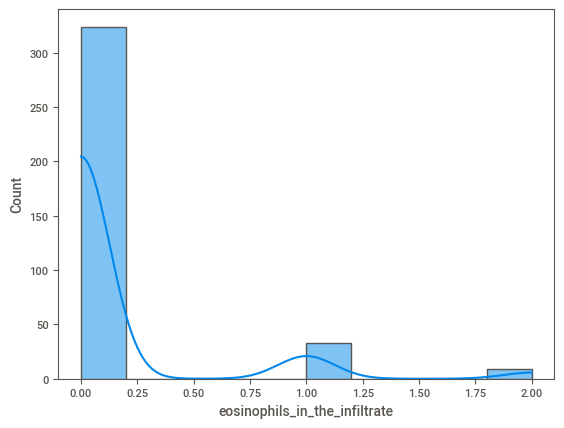

In [129]:
sns.histplot(x='eosinophils_in_the_infiltrate',data=data,kde=True)

In [130]:
iqr=stats.iqr(data.eosinophils_in_the_infiltrate,interpolation='midpoint')
print('iqr : ',iqr)

q1=data.eosinophils_in_the_infiltrate.quantile(0.25)
print('q1 : ',q1)

q3=data.eosinophils_in_the_infiltrate.quantile(0.75)
print('q3 : ',q3)

lowerlimit=q1-1.5*iqr
print('lowerlimit : ',lowerlimit)

upperlimit=q3+1.5*iqr
print('upperlimit : ',upperlimit)

iqr :  0.0
q1 :  0.0
q3 :  0.0
lowerlimit :  0.0
upperlimit :  0.0


In [131]:
data.loc[data['eosinophils_in_the_infiltrate']<lowerlimit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

In [132]:
data.loc[data['eosinophils_in_the_infiltrate']>upperlimit]

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
5           2        3                 2        0                   0   
23          2        2                 2        3                   2   
31          3        2                 0        2                   0   
40          1        1                 1        0                   0   
56          1        1                 1        2                   0   
59          3        3                 0        3                   0   
77          2        1                 2        2                   2   
85          2        2                 2        3                   0   
86          3        3                 2        2                   1   
90          3        2                 1        3                   0   
91          2        1                 0        2                   0   
100         2        2                 1        1                   0   
103         2        3                 1        2                   0   
104         1        2                 2        1                   0   
137         3        3                 2        1                   0   
146         3        2                 0        3                   0   
147         1        1                 0        3                   0   
195         2        2                 1        2                   0   
197         3        2                 2        0                   0   
198         2        2                 2        0                   0   
199         3        2                 1        0                   0   
229         2        2                 0        2                   0   
230         3        2                 0        1                   0   
231         2        3                 0        3                   0   
232         3        2                 0        2                   0   
249         2        1                 1        2                   2   
251         2        2                 2        2                   1   
252         2        2                 2        2                   1   
253         2        1                 2        2                   0   
254         3        1                 2        3                   0   
255         2        1                 2        2                   0   
257         3        2                 1        1                   0   
297         1        1                 2        2                   0   
322         2        1                 1        0                   1   
326         2        1                 2        3                   2   
333         1        0                 0        3                   0   
337         2        1                 0        0                   0   
339         2        1                 2        2                   2   
346         2        2                 2        1                   0   
359         2        2                 0        0                   0   
360         2        2                 1        1                   0   
363         3        2                 2        2                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
5                    0                   0                         0   
23                   2                   0                         2   
31                   0                   0                         0   
40                   0                   1                         0   
56                   0                   0                         0   
59                   0                   0                         0   
77                   0                   0                         0   
85                   0                   0                         0   
86                   0                   0                         0   
90                   0                   0                         0   
91                   0                   0                         0   
1

In [133]:
0+42/366*100

11.475409836065573

- feature contains 11.475409836065573 outlier

# PNL_infiltrate

In [134]:
data.PNL_infiltrate.unique()

array([0, 1, 3, 2], dtype=int64)

In [135]:
data.PNL_infiltrate.value_counts()

0    235
1     69
2     55
3      7
Name: PNL_infiltrate, dtype: int64

<AxesSubplot:xlabel='PNL_infiltrate'>

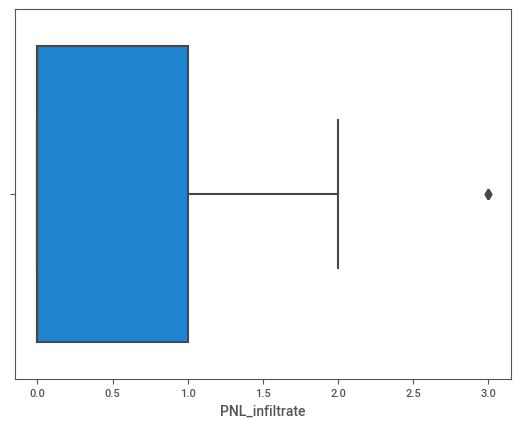

In [136]:
sns.boxplot(x='PNL_infiltrate',data=data)

<AxesSubplot:xlabel='PNL_infiltrate', ylabel='Count'>

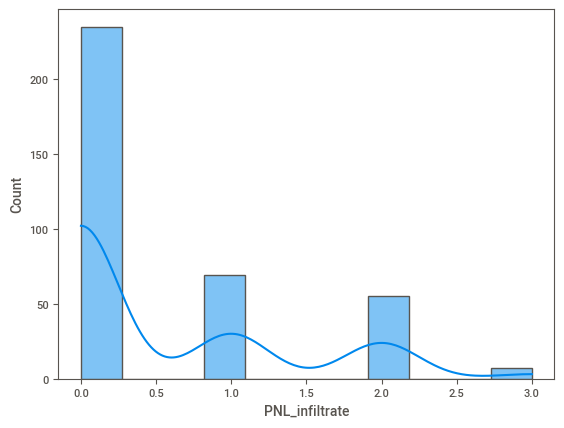

In [137]:
sns.histplot(x='PNL_infiltrate',data=data,kde=True)

In [138]:
iqr=stats.iqr(data.PNL_infiltrate,interpolation='midpoint')
print('iqr : ',iqr)

q1=data.PNL_infiltrate.quantile(0.25)
print('q1 : ',q1)

q3=data.eosinophils_in_the_infiltrate.quantile(0.75)
print('q3 : ',q3)

lowerlimit=q1-1.5*iqr
print('lowerlimit : ',lowerlimit)

upperlimit=q3+1.5*iqr
print('upperlimit : ',upperlimit)

iqr :  1.0
q1 :  0.0
q3 :  0.0
lowerlimit :  -1.5
upperlimit :  1.5


In [139]:
data.loc[data['PNL_infiltrate']<lowerlimit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

In [140]:
data.loc[data['PNL_infiltrate']>upperlimit]

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
3           2        2                 2        0                   0   
11          2        2                 0        3                   0   
12          3        3                 1        2                   0   
16          2        2                 1        3                   0   
17          3        3                 3        0                   0   
21          3        2                 2        0                   0   
28          3        2                 2        2                   0   
31          3        2                 0        2                   0   
33          2        2                 1        0                   0   
35          2        2                 1        2                   0   
64          2        2                 0        3                   0   
75          3        2                 1        2                   0   
76          2        2                 2        1                   0   
77          2        1                 2        2                   2   
81          3        2                 2        2                   0   
82          2        1                 1        2                   0   
85          2        2                 2        3                   0   
86          3        3                 2        2                   1   
90          3        2                 1        3                   0   
107         1        1                 1        1                   1   
119         1        1                 1        1                   1   
124         3        2                 2        2                   2   
141         2        3                 1        2                   1   
142         3        2                 2        3                   2   
153         2        2                 2        0                   0   
165         3        2                 2        3                   1   
166         2        3                 2        2                   1   
171         2        3                 2        0                   0   
172         3        2                 3        0                   0   
173         3        3                 3        0                   0   
175         2        2                 2        0                   0   
176         3        2                 3        0                   0   
177         2        2                 0        3                   0   
180         2        3                 2        0                   0   
181         3        2                 2        0                   0   
182         1        3                 1        0                   0   
183         2        2                 2        0                   0   
186         3        2                 0        3                   0   
187         2        3                 0        2                   0   
188         3        2                 0        2                   0   
189         2        2                 2        0                   0   
193         2        2                 2        0                   0   
194         3        2                 2        0                   0   
198         2        2                 2        0                   0   
205         3        2                 2        0                   0   
206         2        3                 2        0                   1   
207         3        2                 2        0                   2   
208         2        3                 2        0                   0   
209         2        3                 2        0                   0   
210         3        2                 2        0                   0   
211         2        3                 2        0                   0   
230         3        2                 0        1                   0   
231         2        3                 0        3                   0   
232         3        2                 0        2              

In [141]:
0+62/366*100

16.939890710382514

- Feature contains 16.939890710382514 outlier

# fibrosis_of_the_papillary_dermis

In [142]:
data.fibrosis_of_the_papillary_dermis.unique()

array([0, 3, 1, 2], dtype=int64)

In [143]:
data.fibrosis_of_the_papillary_dermis.value_counts()

0    312
3     23
2     23
1      8
Name: fibrosis_of_the_papillary_dermis, dtype: int64

<AxesSubplot:xlabel='fibrosis_of_the_papillary_dermis'>

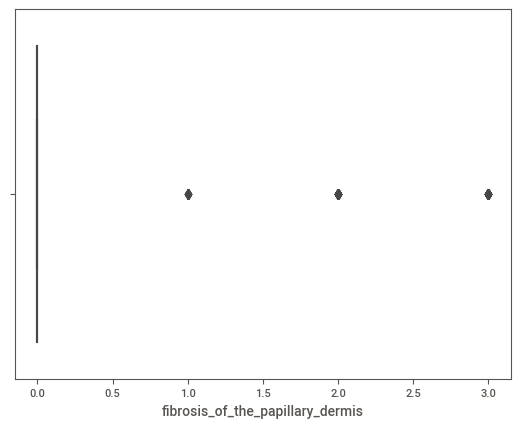

In [144]:
sns.boxplot(x='fibrosis_of_the_papillary_dermis',data=data)

<AxesSubplot:xlabel='fibrosis_of_the_papillary_dermis', ylabel='Count'>

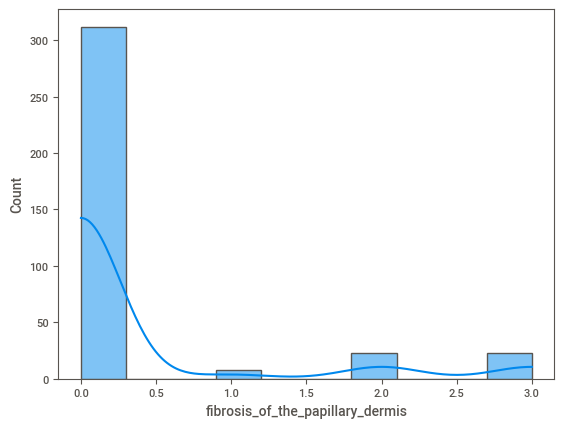

In [145]:
sns.histplot(x='fibrosis_of_the_papillary_dermis',data=data,kde=True)

In [146]:
iqr=stats.iqr(data.fibrosis_of_the_papillary_dermis,interpolation='midpoint')
print('iqr : ',iqr)

q1=data.fibrosis_of_the_papillary_dermis.quantile(0.25)
print('q1 : ',q1)

q3=data.fibrosis_of_the_papillary_dermis.quantile(0.75)
print('q3 : ',q3)

lowerlimit=q1-1.5*iqr
print('lowerlimit : ',lowerlimit)

upperlimit=q3+1.5*iqr
print('upperlimit : ',upperlimit)

iqr :  0.0
q1 :  0.0
q3 :  0.0
lowerlimit :  0.0
upperlimit :  0.0


In [147]:
data.loc[data['fibrosis_of_the_papillary_dermis']<lowerlimit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

In [148]:
data.loc[data['fibrosis_of_the_papillary_dermis']>upperlimit]

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
6           2        1                 0        2                   0   
19          1        1                 0        3                   0   
22          2        2                 0        2                   0   
24          2        0                 0        3                   0   
27          1        2                 2        3                   0   
44          0        1                 0        3                   0   
54          0        1                 0        2                   0   
62          1        1                 0        1                   0   
68          3        3                 3        2                   0   
73          1        1                 1        1                   0   
79          2        2                 1        2                   0   
84          1        1                 2        3                   0   
92          1        1                 1        3                   0   
97          1        1                 1        0                   0   
101         1        1                 2        0                   0   
112         1        1                 2        0                   0   
115         2        2                 2        3                   0   
117         2        2                 3        2                   2   
121         2        2                 2        1                   0   
128         1        1                 0        0                   0   
133         2        2                 1        0                   0   
134         3        2                 2        0                   0   
143         2        1                 1        3                   2   
147         1        1                 0        3                   0   
154         1        0                 1        2                   0   
200         1        1                 0        2                   0   
201         1        1                 0        1                   0   
202         2        2                 0        2                   0   
203         1        1                 0        1                   0   
204         2        2                 0        2                   0   
222         1        1                 1        3                   0   
223         2        1                 2        2                   0   
224         2        1                 3        3                   0   
225         2        1                 2        2                   0   
226         1        2                 1        1                   0   
227         1        1                 1        2                   0   
228         2        1                 2        0                   0   
262         2        1                 0        2                   0   
263         1        1                 1        3                   0   
264         1        1                 0        2                   0   
265         1        1                 0        3                   0   
295         2        1                 0        2                   0   
296         2        1                 1        3                   0   
297         1        1                 2        2                   0   
298         2        1                 0        3                   0   
299         2        2                 1        3                   0   
333         1        0                 0        3                   0   
334         2        0                 1        3                   0   
337         2        1                 0        0                   0   
338         3        1                 0        1                   0   
341         1        1                 0        2                   0   
342         2        0                 1        2                   0   
353         1        1                 1        2                   0   
354         2        0                 1        2              

In [149]:
0+54/366*100

14.754098360655737

- feature contains 14.754098360655737 outlier

# exocytosis

In [150]:
data.exocytosis.unique()

array([3, 1, 0, 2], dtype=int64)

In [151]:
data.exocytosis.value_counts()

2    129
0    118
3     62
1     57
Name: exocytosis, dtype: int64

<AxesSubplot:xlabel='exocytosis'>

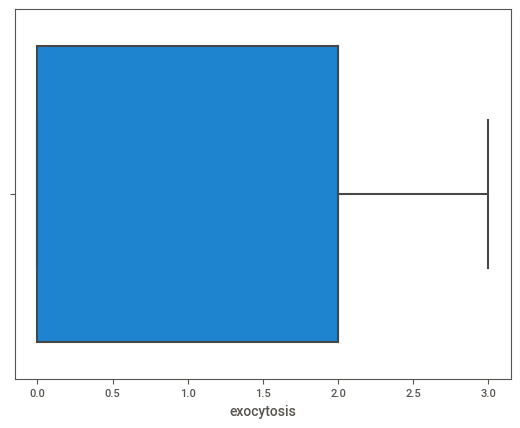

In [152]:
sns.boxplot(x='exocytosis',data=data)

<AxesSubplot:xlabel='exocytosis', ylabel='Count'>

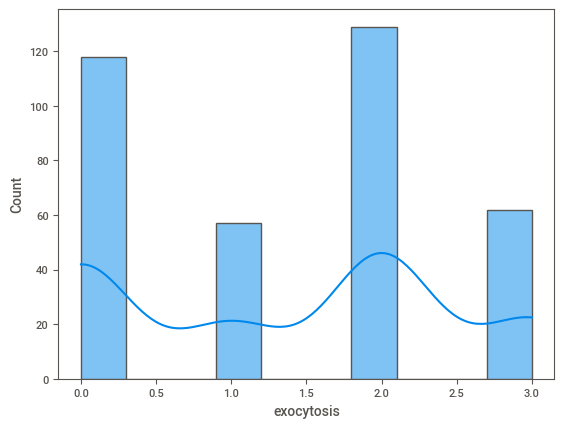

In [153]:
sns.histplot(x='exocytosis',data=data,kde=True)

In [154]:
iqr=stats.iqr(data.exocytosis,interpolation='midpoint')
print('iqr : ',iqr)

q1=data.scaling.quantile(0.25)
print('q1 : ',q1)

q3=data.scaling.quantile(0.75)
print('q3 : ',q3)

lowerlimit=q1-1.5*iqr
print('lowerlimit : ',lowerlimit)

upperlimit=q3+1.5*iqr
print('upperlimit : ',upperlimit)

iqr :  2.0
q1 :  1.0
q3 :  2.0
lowerlimit :  -2.0
upperlimit :  5.0


In [155]:
data.loc[data['exocytosis']<lowerlimit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

In [156]:
data.loc[data['exocytosis']>upperlimit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

# acanthosis

In [157]:
data.acanthosis.unique()

array([2, 3, 1, 0], dtype=int64)

In [158]:
data.acanthosis.value_counts()

2    210
3     75
1     71
0     10
Name: acanthosis, dtype: int64

<AxesSubplot:xlabel='acanthosis'>

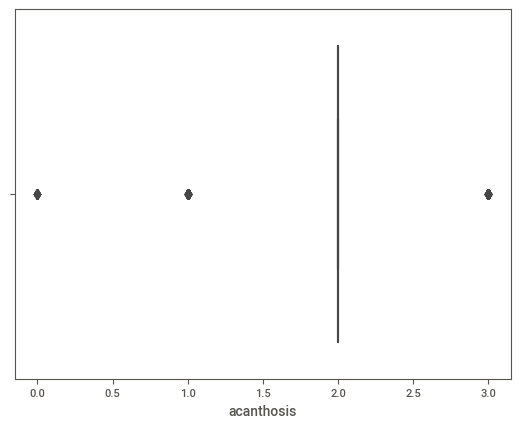

In [159]:
sns.boxplot(x='acanthosis',data=data)

<AxesSubplot:xlabel='acanthosis', ylabel='Count'>

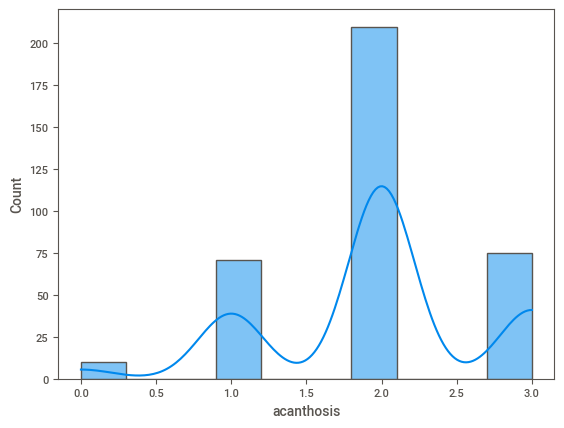

In [160]:
sns.histplot(x='acanthosis',data=data,kde=True)

In [161]:
iqr=stats.iqr(data.acanthosis,interpolation='midpoint')
print('iqr : ',iqr)

q1=data.scaling.quantile(0.25)
print('q1 : ',q1)

q3=data.scaling.quantile(0.75)
print('q3 : ',q3)

lowerlimit=q1-1.5*iqr
print('lowerlimit : ',lowerlimit)

upperlimit=q3+1.5*iqr
print('upperlimit : ',upperlimit)

iqr :  0.0
q1 :  1.0
q3 :  2.0
lowerlimit :  1.0
upperlimit :  2.0


In [162]:
data.loc[data['acanthosis']<lowerlimit]

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
35          2        2                 1        2                   0   
74          2        1                 2        2                   1   
91          2        1                 0        2                   0   
98          2        2                 2        2                   2   
106         1        1                 0        1                   1   
118         2        2                 0        2                   2   
136         2        2                 0        2                   1   
143         2        1                 1        3                   2   
198         2        2                 2        0                   0   
199         3        2                 1        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
35                   0                   0                         0   
74                   0                   0                         0   
91                   0                   0                         0   
98                   0                   0                         0   
106                  0                   0                         0   
118                  0                   0                         0   
136                  0                   0                         0   
143                  2                   0                         2   
198                  0                   0                         0   
199                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  ...  \
35                            0                  0  ...   
74                            0                  0  ...   
91                            0                  0  ...   
98                            2                  1  ...   
106                           0                  0  ...   
118                           0                  0  ...   
136                           0                  0  ...   
143                           0                  0  ...   
198                           0                  0  ...   
199                           0                  0  ...   

     disappearance_of_the_granular_layer  \
35                                     0   
74                                     0   
91                                     0   
98                                     0   
106                                    0   
118                                    0   
136                                    0   
143                                    2   
198                                    0   
199                                    0   

     vacuolisation_and_damage_of_basal_layer  spongiosis  \
35                                         0           0   
74                                         0           2   
91                                         0           0   
98                                         0           0   
106                                        0           2   
118                                        0           3   
136                                        0           3   
143                                        0           2   
198                                        0           2   
199                                        0           2   

     saw-tooth_appearance_of_retes  follicular_horn_plug  \
35                               0                     0   
74                               0                     0   
91                               0                     0   
98                               0                     0   
106                              0                     0   
118                              0                     0   
136                              0                     0   
143                              2                     0   
198                              0                     0   
199         

In [163]:
data.loc[data['acanthosis']>upperlimit]

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
6           2        1                 0        2                   0   
7           2        2                 3        3                   0   
10          3        3                 2        1                   1   
19          1        1                 0        3                   0   
22          2        2                 0        2                   0   
28          3        2                 2        2                   0   
32          2        3                 3        3                   0   
62          1        1                 0        1                   0   
63          3        3                 2        1                   1   
88          0        1                 2        1                   1   
92          1        1                 1        3                   0   
104         1        2                 2        1                   0   
108         2        2                 3        2                   1   
113         2        2                 3        2                   0   
121         2        2                 2        1                   0   
124         3        2                 2        2                   2   
125         2        2                 1        1                   0   
128         1        1                 0        0                   0   
133         2        2                 1        0                   0   
137         3        3                 2        1                   0   
145         2        2                 3        3                   1   
147         1        1                 0        3                   0   
153         2        2                 2        0                   0   
154         1        0                 1        2                   0   
156         2        3                 0        2                   0   
169         2        2                 3        3                   1   
170         1        1                 2        3                   1   
174         3        2                 2        2                   0   
176         3        2                 3        0                   0   
177         2        2                 0        3                   0   
179         2        2                 2        2                   0   
180         2        3                 2        0                   0   
183         2        2                 2        0                   0   
187         2        3                 0        2                   0   
190         2        1                 2        3                   1   
194         3        2                 2        0                   0   
205         3        2                 2        0                   0   
207         3        2                 2        0                   2   
209         2        3                 2        0                   0   
210         3        2                 2        0                   0   
214         3        2                 3        2                   2   
216         2        2                 3        2                   2   
217         3        2                 2        3                   0   
222         1        1                 1        3                   0   
223         2        1                 2        2                   0   
231         2        3                 0        3                   0   
243         2        2                 2        2                   0   
245         3        3                 3        0                   0   
250         2        2                 2        2                   0   
254         3        1                 2        3                   0   
255         2        1                 2        2                   0   
262         2        1                 0        2                   0   
263         1        1                 1        3                   0   
264         1        1                 0        2              

In [164]:
10+75/366*100

30.491803278688526

- feature contains 30.491803278688526 outlier

# hyperkeratosis

In [165]:
data.hyperkeratosis.unique()

array([0, 2, 1, 3], dtype=int64)

In [166]:
data.hyperkeratosis.value_counts()

0    227
1     90
2     44
3      5
Name: hyperkeratosis, dtype: int64

<AxesSubplot:xlabel='hyperkeratosis'>

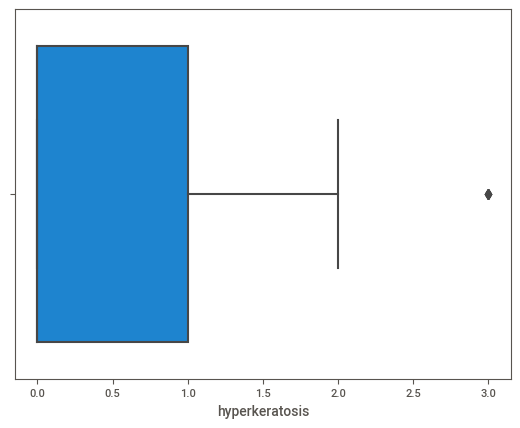

In [167]:
sns.boxplot(x='hyperkeratosis',data=data)

<AxesSubplot:xlabel='hyperkeratosis', ylabel='Count'>

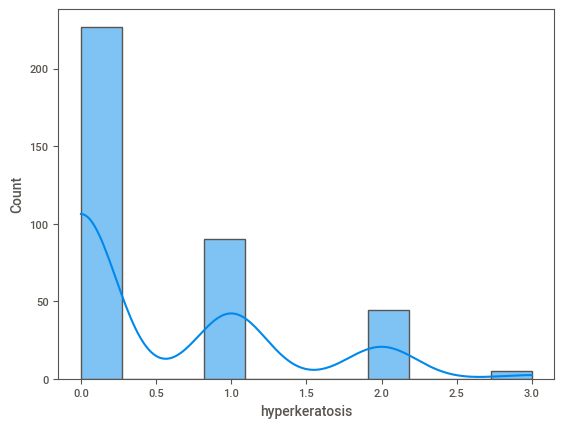

In [168]:
sns.histplot(x='hyperkeratosis',data=data,kde=True)

In [169]:
iqr=stats.iqr(data.hyperkeratosis,interpolation='midpoint')
print('iqr : ',iqr)

q1=data.hyperkeratosis.quantile(0.25)
print('q1 : ',q1)

q3=data.hyperkeratosis.quantile(0.75)
print('q3 : ',q3)

lowerlimit=q1-1.5*iqr
print('lowerlimit : ',lowerlimit)

upperlimit=q3+1.5*iqr
print('upperlimit : ',upperlimit)

iqr :  1.0
q1 :  0.0
q3 :  1.0
lowerlimit :  -1.5
upperlimit :  2.5


In [170]:
data.loc[data['hyperkeratosis']<lowerlimit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

In [171]:
data.loc[data['hyperkeratosis']>upperlimit]

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
28          3        2                 2        2                   0   
109         3        2                 1        2                   2   
206         2        3                 2        0                   1   
236         3        2                 3        2                   0   
238         2        2                 2        2                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
28                   0                   0                         0   
109                  0                   0                         0   
206                  0                   0                         0   
236                  0                   0                         0   
238                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  ...  \
28                            0                  0  ...   
109                           2                  2  ...   
206                           2                  0  ...   
236                           0                  2  ...   
238                           0                  1  ...   

     disappearance_of_the_granular_layer  \
28                                     0   
109                                    0   
206                                    0   
236                                    3   
238                                    2   

     vacuolisation_and_damage_of_basal_layer  spongiosis  \
28                                         0           2   
109                                        0           0   
206                                        0           0   
236                                        0           0   
238                                        0           0   

     saw-tooth_appearance_of_retes  follicular_horn_plug  \
28                               0                     1   
109                              0                     0   
206                              0                     0   
236                              0                     0   
238                              0                     0   

     perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  \
28                              1                                    2   
109                             0                                    3   
206                             0                                    1   
236                             0                                    3   
238                             0                                    1   

     band-like_infiltrate  Age  class  
28                      0   43      2  
109                     1   36      1  
206                     0   20      1  
236                     0   35      1  
238                     0   60      1  

[5 rows x 35 columns]

In [172]:
0+5/366*100

1.366120218579235

In [173]:
data.loc[data['hyperkeratosis']>upperlimit,'hyperkeratosis']=data['hyperkeratosis'].median()

In [174]:
data.loc[data['hyperkeratosis']>upperlimit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

# parakeratosis

In [175]:
data.parakeratosis.unique()

array([0, 2, 3, 1], dtype=int64)

In [176]:
data.parakeratosis.value_counts()

2    132
1    118
0     86
3     30
Name: parakeratosis, dtype: int64

<AxesSubplot:xlabel='parakeratosis'>

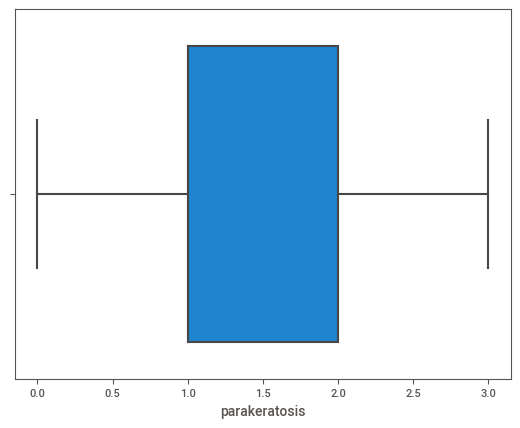

In [177]:
sns.boxplot(x='parakeratosis',data=data)

<AxesSubplot:xlabel='parakeratosis', ylabel='Count'>

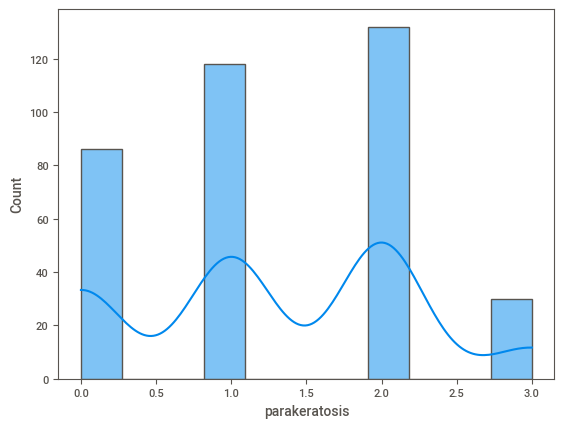

In [178]:
sns.histplot(x='parakeratosis',data=data,kde=True)

In [179]:
iqr=stats.iqr(data.parakeratosis,interpolation='midpoint')
print('iqr : ',iqr)

q1=data.parakeratosis.quantile(0.25)
print('q1 : ',q1)

q3=data.parakeratosis.quantile(0.75)
print('q3 : ',q3)

lowerlimit=q1-1.5*iqr
print('lowerlimit : ',lowerlimit)

upperlimit=q3+1.5*iqr
print('upperlimit : ',upperlimit)

iqr :  1.0
q1 :  1.0
q3 :  2.0
lowerlimit :  -0.5
upperlimit :  3.5


In [180]:
data.loc[data['parakeratosis']<lowerlimit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

In [181]:
data.loc[data['parakeratosis']>upperlimit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

# clubbing_of_the_rete_ridges

In [182]:
data.clubbing_of_the_rete_ridges.unique()

array([0, 2, 1, 3], dtype=int64)

In [183]:
data.clubbing_of_the_rete_ridges.value_counts()

0    252
2     61
3     34
1     19
Name: clubbing_of_the_rete_ridges, dtype: int64

<AxesSubplot:xlabel='clubbing_of_the_rete_ridges'>

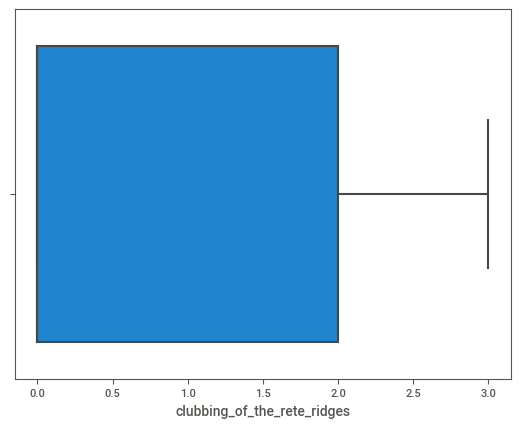

In [184]:
sns.boxplot(x='clubbing_of_the_rete_ridges',data=data)

<AxesSubplot:xlabel='clubbing_of_the_rete_ridges', ylabel='Count'>

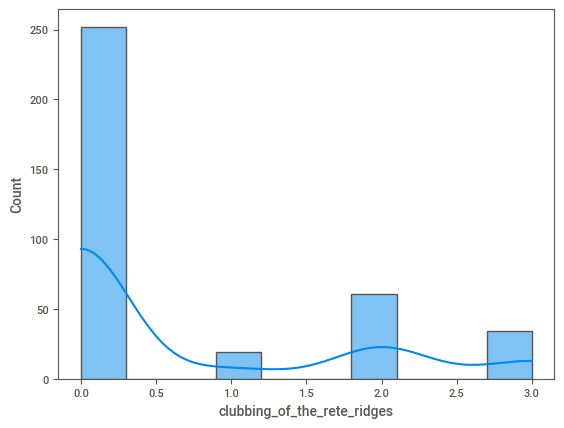

In [185]:
sns.histplot(x='clubbing_of_the_rete_ridges',data=data,kde=True)

In [186]:
iqr=stats.iqr(data.clubbing_of_the_rete_ridges,interpolation='midpoint')
print('iqr : ',iqr)

q1=data.clubbing_of_the_rete_ridges.quantile(0.25)
print('q1 : ',q1)

q3=data.clubbing_of_the_rete_ridges.quantile(0.75)
print('q3 : ',q3)

lowerlimit=q1-1.5*iqr
print('lowerlimit : ',lowerlimit)

upperlimit=q3+1.5*iqr
print('upperlimit : ',upperlimit)

iqr :  2.0
q1 :  0.0
q3 :  2.0
lowerlimit :  -3.0
upperlimit :  5.0


In [187]:
data.loc[data['clubbing_of_the_rete_ridges']<lowerlimit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

In [188]:
data.loc[data['clubbing_of_the_rete_ridges']>upperlimit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

# elongation_of_the_rete_ridges

In [189]:
data.elongation_of_the_rete_ridges.unique()

array([0, 2, 3, 1], dtype=int64)

In [190]:
data.elongation_of_the_rete_ridges.value_counts()

0    198
2     95
3     50
1     23
Name: elongation_of_the_rete_ridges, dtype: int64

<AxesSubplot:xlabel='elongation_of_the_rete_ridges'>

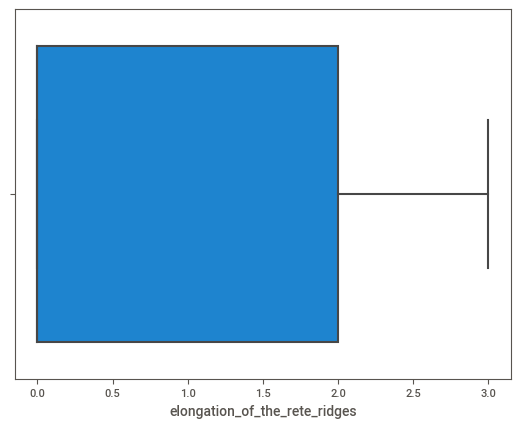

In [191]:
sns.boxplot(x='elongation_of_the_rete_ridges',data=data)

<AxesSubplot:xlabel='elongation_of_the_rete_ridges', ylabel='Count'>

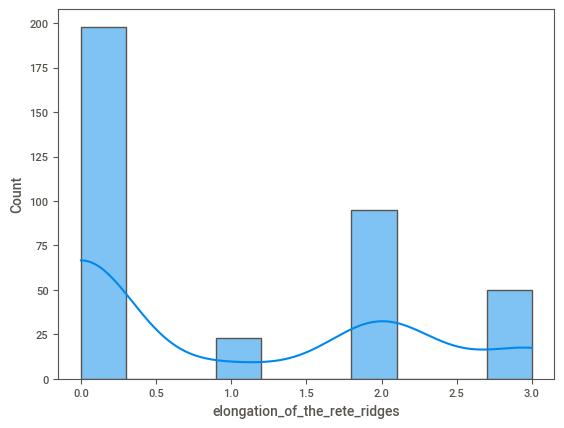

In [192]:
sns.histplot(x='elongation_of_the_rete_ridges',data=data,kde=True)

In [193]:
iqr=stats.iqr(data.elongation_of_the_rete_ridges,interpolation='midpoint')
print('iqr : ',iqr)

q1=data.elongation_of_the_rete_ridges.quantile(0.25)
print('q1 : ',q1)

q3=data.elongation_of_the_rete_ridges.quantile(0.75)
print('q3 : ',q3)

lowerlimit=q1-1.5*iqr
print('lowerlimit : ',lowerlimit)

upperlimit=q3+1.5*iqr
print('upperlimit : ',upperlimit)

iqr :  2.0
q1 :  0.0
q3 :  2.0
lowerlimit :  -3.0
upperlimit :  5.0


In [194]:
data.loc[data['elongation_of_the_rete_ridges']<lowerlimit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

In [195]:
data.loc[data['elongation_of_the_rete_ridges']>upperlimit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

# thinning_of_the_suprapapillary_epidermis

In [196]:
data.thinning_of_the_suprapapillary_epidermis.unique()

array([0, 2, 3, 1], dtype=int64)

In [197]:
data.thinning_of_the_suprapapillary_epidermis.value_counts()

0    256
2     60
3     31
1     19
Name: thinning_of_the_suprapapillary_epidermis, dtype: int64

<AxesSubplot:xlabel='thinning_of_the_suprapapillary_epidermis'>

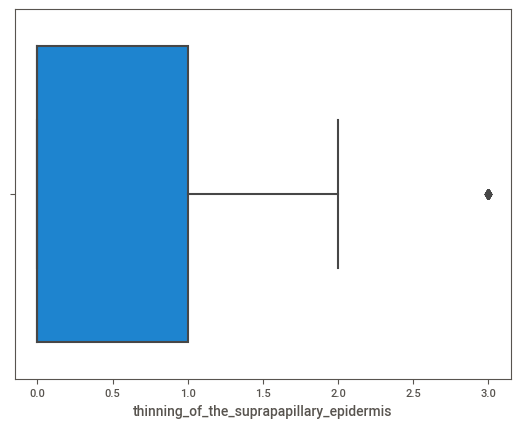

In [198]:
sns.boxplot(x='thinning_of_the_suprapapillary_epidermis',data=data)

<AxesSubplot:xlabel='thinning_of_the_suprapapillary_epidermis', ylabel='Count'>

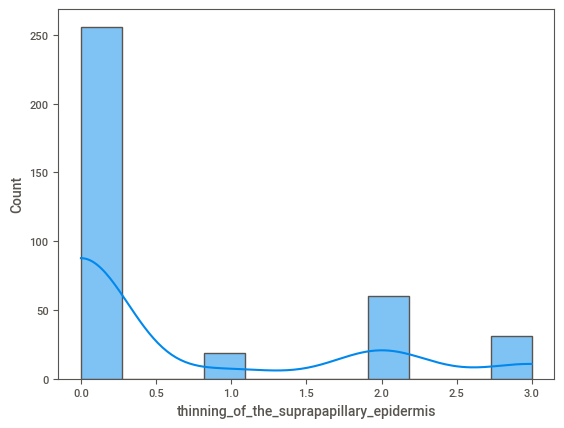

In [199]:
sns.histplot(x='thinning_of_the_suprapapillary_epidermis',data=data,kde=True)

In [200]:
iqr=stats.iqr(data.thinning_of_the_suprapapillary_epidermis,interpolation='midpoint')
print('iqr : ',iqr)

q1=data.thinning_of_the_suprapapillary_epidermis.quantile(0.25)
print('q1 : ',q1)

q3=data.thinning_of_the_suprapapillary_epidermis.quantile(0.75)
print('q3 : ',q3)

lowerlimit=q1-1.5*iqr
print('lowerlimit : ',lowerlimit)

upperlimit=q3+1.5*iqr
print('upperlimit : ',upperlimit)

iqr :  1.0
q1 :  0.0
q3 :  1.0
lowerlimit :  -1.5
upperlimit :  2.5


In [201]:
data.loc[data['thinning_of_the_suprapapillary_epidermis']<lowerlimit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

In [202]:
data.loc[data['thinning_of_the_suprapapillary_epidermis']>upperlimit]

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
13          2        3                 3        0                   0   
17          3        3                 3        0                   0   
32          2        3                 3        3                   0   
53          3        1                 1        1                   1   
66          2        2                 2        0                   0   
88          0        1                 2        1                   1   
109         3        2                 1        2                   2   
123         2        3                 3        3                   0   
130         1        1                 2        2                   2   
142         3        2                 2        3                   2   
176         3        2                 3        0                   0   
182         1        3                 1        0                   0   
183         2        2                 2        0                   0   
194         3        2                 2        0                   0   
208         2        3                 2        0                   0   
209         2        3                 2        0                   0   
241         2        2                 2        3                   0   
245         3        3                 3        0                   0   
274         1        2                 2        1                   1   
283         2        3                 3        1                   0   
292         2        3                 2        0                   1   
294         2        1                 3        0                   1   
317         2        2                 2        0                   1   
319         3        2                 2        0                   0   
324         2        2                 3        0                   1   
329         2        2                 2        2                   2   
330         2        1                 2        0                   0   
340         2        2                 3        0                   0   
356         2        2                 2        2                   2   
357         2        2                 2        0                   1   
365         3        2                 2        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
13                   0                   0                         0   
17                   0                   0                         0   
32                   0                   0                         0   
53                   0                   0                         0   
66                   0                   0                         0   
88                   0                   1                         0   
109                  0                   0                         0   
123                  0                   0                         0   
130                  0                   2                         0   
142                  0                   0                         0   
176                  0                   0                         0   
182                  0                   0                         0   
183                  0                   0                         0   
194                  0                   0                         0   
208                  0                   0                         0   
209                  0                   0                         0   
241                  0                   0                         0   
245                  0                   0                         0   
274                  0                   0                         0   
283                  0                   0                         0   
292                  0                   0                         0   
294                  0                   0                         0   
317         

In [203]:
0+31/366*100

8.469945355191257

- feature contains 8.46 outlier

# spongiform_pustule

In [204]:
data.spongiform_pustule.unique()

array([0, 2, 1, 3], dtype=int64)

In [205]:
data.spongiform_pustule.value_counts()

0    296
1     38
2     26
3      6
Name: spongiform_pustule, dtype: int64

<AxesSubplot:xlabel='spongiform_pustule'>

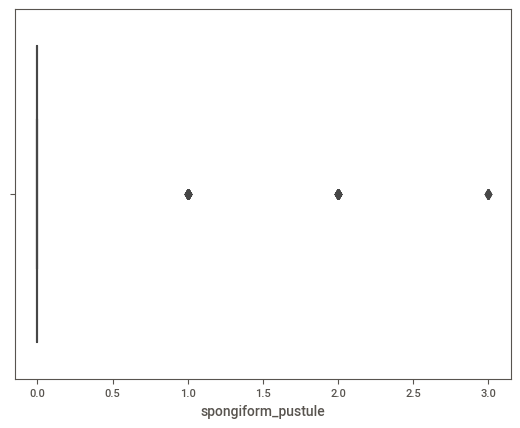

In [206]:
sns.boxplot(x='spongiform_pustule',data=data)

<AxesSubplot:xlabel='spongiform_pustule', ylabel='Count'>

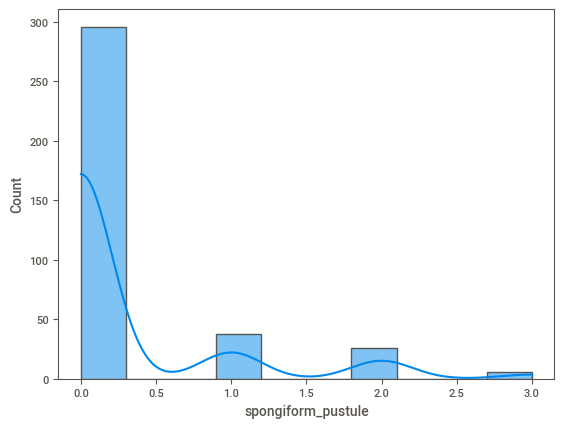

In [207]:
sns.histplot(x='spongiform_pustule',data=data,kde=True)

In [208]:
iqr=stats.iqr(data.spongiform_pustule,interpolation='midpoint')
print('iqr : ',iqr)

q1=data.spongiform_pustule.quantile(0.25)
print('q1 : ',q1)

q3=data.spongiform_pustule.quantile(0.75)
print('q3 : ',q3)

lowerlimit=q1-1.5*iqr
print('lowerlimit : ',lowerlimit)

upperlimit=q3+1.5*iqr
print('upperlimit : ',upperlimit)

iqr :  0.0
q1 :  0.0
q3 :  0.0
lowerlimit :  0.0
upperlimit :  0.0


In [209]:
data.loc[data['spongiform_pustule']<lowerlimit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

In [210]:
data.loc[data['spongiform_pustule']>upperlimit]

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
1           3        3                 3        2                   1   
3           2        2                 2        0                   0   
5           2        3                 2        0                   0   
10          3        3                 2        1                   1   
11          2        2                 0        3                   0   
17          3        3                 3        0                   0   
20          2        1                 1        2                   0   
21          3        2                 2        0                   0   
25          2        1                 1        0                   1   
30          3        2                 1        2                   0   
31          3        2                 0        2                   0   
32          2        3                 3        3                   0   
37          2        1                 1        1                   0   
52          2        2                 1        0                   0   
63          3        3                 2        1                   1   
66          2        2                 2        0                   0   
77          2        1                 2        2                   2   
80          3        2                 2        2                   2   
85          2        2                 2        3                   0   
86          3        3                 2        2                   1   
88          0        1                 2        1                   1   
93          3        3                 3        3                   0   
98          2        2                 2        2                   2   
100         2        2                 1        1                   0   
102         3        3                 3        2                   2   
110         2        2                 2        3                   2   
130         1        1                 2        2                   2   
131         2        2                 2        3                   2   
135         1        1                 1        1                   1   
139         3        3                 3        3                   2   
141         2        3                 1        2                   1   
142         3        2                 2        3                   2   
151         2        3                 2        1                   0   
152         3        3                 2        2                   0   
165         3        2                 2        3                   1   
166         2        3                 2        2                   1   
171         2        3                 2        0                   0   
172         3        2                 3        0                   0   
173         3        3                 3        0                   0   
175         2        2                 2        0                   0   
176         3        2                 3        0                   0   
180         2        3                 2        0                   0   
189         2        2                 2        0                   0   
193         2        2                 2        0                   0   
194         3        2                 2        0                   0   
195         2        2                 1        2                   0   
197         3        2                 2        0                   0   
205         3        2                 2        0                   0   
206         2        3                 2        0                   1   
207         3        2                 2        0                   2   
208         2        3                 2        0                   0   
209         2        3                 2        0                   0   
210         3        2                 2        0                   0   
211         2        3                 2        0              

In [211]:
0+70/366*100

19.12568306010929

- Feature contains 19.12 outlier

# munro_microabcess

In [212]:
data.munro_microabcess.unique()

array([0, 1, 2, 3], dtype=int64)

In [213]:
data.munro_microabcess.value_counts()

0    286
1     37
2     33
3     10
Name: munro_microabcess, dtype: int64

<AxesSubplot:xlabel='munro_microabcess'>

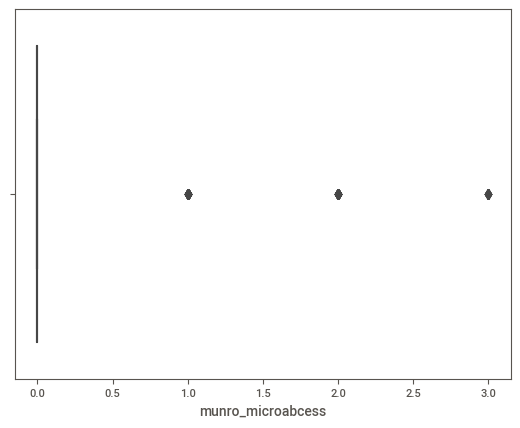

In [214]:
sns.boxplot(x='munro_microabcess',data=data)

<AxesSubplot:xlabel='munro_microabcess', ylabel='Count'>

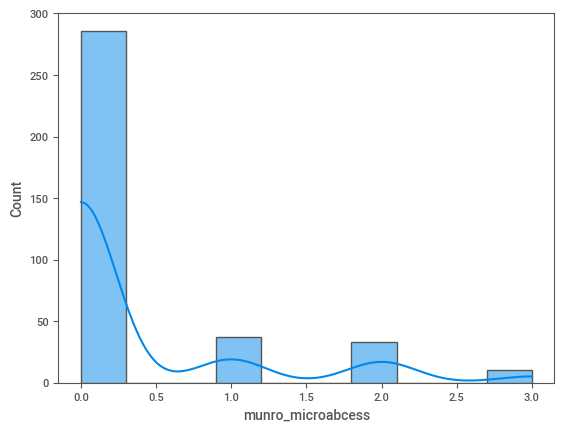

In [215]:
sns.histplot(x='munro_microabcess',data=data,kde=True)

In [216]:
iqr=stats.iqr(data.munro_microabcess,interpolation='midpoint')
print('iqr : ',iqr)

q1=data.munro_microabcess.quantile(0.25)
print('q1 : ',q1)

q3=data.munro_microabcess.quantile(0.75)
print('q3 : ',q3)

lowerlimit=q1-1.5*iqr
print('lowerlimit : ',lowerlimit)

upperlimit=q3+1.5*iqr
print('upperlimit : ',upperlimit)

iqr :  0.0
q1 :  0.0
q3 :  0.0
lowerlimit :  0.0
upperlimit :  0.0


In [217]:
data.loc[data['munro_microabcess']<lowerlimit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

In [218]:
data.loc[data['munro_microabcess']>upperlimit]

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
1           3        3                 3        2                   1   
10          3        3                 2        1                   1   
13          2        3                 3        0                   0   
17          3        3                 3        0                   0   
25          2        1                 1        0                   1   
30          3        2                 1        2                   0   
32          2        3                 3        3                   0   
33          2        2                 1        0                   0   
39          3        3                 2        0                   0   
42          3        2                 1        1                   0   
51          1        1                 1        0                   2   
52          2        2                 1        0                   0   
53          3        1                 1        1                   1   
55          2        2                 2        0                   0   
61          2        1                 1        0                   0   
63          3        3                 2        1                   1   
66          2        2                 2        0                   0   
77          2        1                 2        2                   2   
80          3        2                 2        2                   2   
85          2        2                 2        3                   0   
86          3        3                 2        2                   1   
88          0        1                 2        1                   1   
93          3        3                 3        3                   0   
98          2        2                 2        2                   2   
102         3        3                 3        2                   2   
105         2        2                 2        2                   2   
107         1        1                 1        1                   1   
109         3        2                 1        2                   2   
110         2        2                 2        3                   2   
119         1        1                 1        1                   1   
124         3        2                 2        2                   2   
130         1        1                 2        2                   2   
131         2        2                 2        3                   2   
135         1        1                 1        1                   1   
139         3        3                 3        3                   2   
142         3        2                 2        3                   2   
143         2        1                 1        3                   2   
165         3        2                 2        3                   1   
166         2        3                 2        2                   1   
193         2        2                 2        0                   0   
205         3        2                 2        0                   0   
206         2        3                 2        0                   1   
208         2        3                 2        0                   0   
209         2        3                 2        0                   0   
233         2        2                 2        1                   1   
234         3        2                 3        0                   1   
241         2        2                 2        3                   0   
242         3        2                 2        3                   0   
243         2        2                 2        2                   0   
244         2        1                 2        0                   0   
245         3        3                 3        0                   0   
246         2        2                 2        0                   0   
247         2        2                 2        0                   0   
273         2        2                 3        1              

In [219]:
0+80/366*100

21.85792349726776

- feature contains 21.85 outlier

# focal_hypergranulosis

In [220]:
data.focal_hypergranulosis.unique()

array([0, 2, 3, 1], dtype=int64)

In [221]:
data.focal_hypergranulosis.value_counts()

0    295
2     43
3     15
1     13
Name: focal_hypergranulosis, dtype: int64

<AxesSubplot:xlabel='focal_hypergranulosis'>

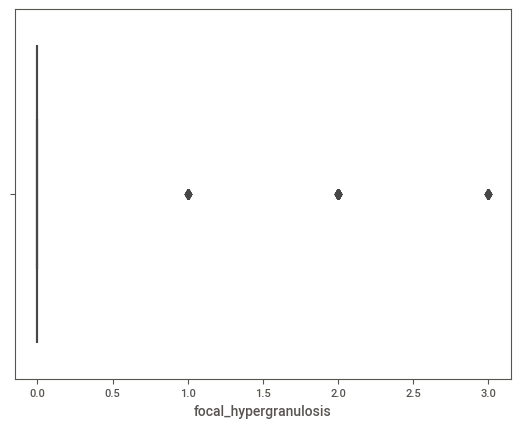

In [222]:
sns.boxplot(x='focal_hypergranulosis',data=data)

<AxesSubplot:xlabel='focal_hypergranulosis', ylabel='Count'>

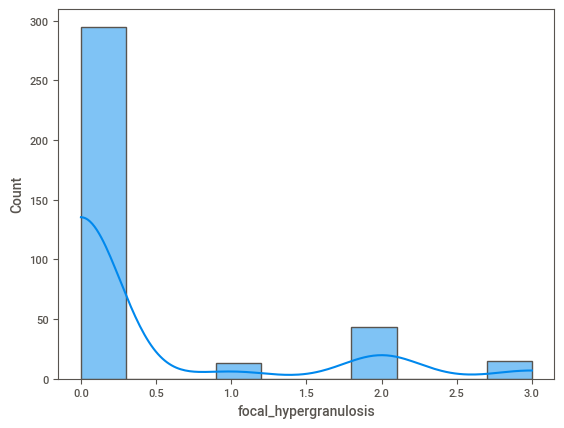

In [223]:
sns.histplot(x='focal_hypergranulosis',data=data,kde=True)

In [224]:
iqr=stats.iqr(data.focal_hypergranulosis,interpolation='midpoint')
print('iqr : ',iqr)

q1=data.focal_hypergranulosis.quantile(0.25)
print('q1 : ',q1)

q3=data.focal_hypergranulosis.quantile(0.75)
print('q3 : ',q3)

lowerlimit=q1-1.5*iqr
print('lowerlimit : ',lowerlimit)

upperlimit=q3+1.5*iqr
print('upperlimit : ',upperlimit)

iqr :  0.0
q1 :  0.0
q3 :  0.0
lowerlimit :  0.0
upperlimit :  0.0


In [225]:
data.loc[data['focal_hypergranulosis']<lowerlimit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

In [226]:
data.loc[data['focal_hypergranulosis']>upperlimit]

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
2           2        1                 2        3                   1   
4           2        3                 2        2                   2   
14          2        2                 3        3                   0   
18          2        1                 3        3                   0   
23          2        2                 2        3                   2   
26          1        1                 0        1                   0   
29          1        1                 2        3                   2   
36          2        1                 2        3                   2   
38          2        1                 2        3                   2   
45          2        1                 1        1                   1   
49          2        0                 1        0                   0   
50          3        1                 1        2                   2   
57          2        1                 1        3                   0   
65          3        2                 2        2                   0   
72          1        1                 1        1                   1   
78          0        0                 0        0                   0   
87          2        1                 2        1                   1   
94          2        1                 1        3                   2   
108         2        2                 3        2                   1   
111         2        2                 2        3                   2   
113         2        2                 3        2                   0   
114         1        1                 1        2                   2   
117         2        2                 3        2                   2   
127         2        2                 2        2                   0   
132         3        2                 2        1                   0   
138         2        3                 2        3                   0   
144         1        1                 2        3                   2   
145         2        2                 3        3                   1   
155         2        1                 1        1                   0   
157         3        3                 2        2                   0   
162         3        2                 2        2                   0   
167         2        2                 3        3                   1   
169         2        2                 3        3                   1   
170         1        1                 2        3                   1   
174         3        2                 2        2                   0   
178         1        2                 2        2                   0   
179         2        2                 2        2                   0   
190         2        1                 2        3                   1   
191         2        3                 3        3                   0   
192         3        2                 2        2                   0   
196         3        2                 3        3                   1   
212         2        2                 2        3                   1   
213         2        2                 2        2                   1   
214         3        2                 3        2                   2   
215         2        3                 2        3                   0   
216         2        2                 3        2                   2   
217         3        2                 2        3                   0   
249         2        1                 1        2                   2   
250         2        2                 2        2                   0   
251         2        2                 2        2                   1   
252         2        2                 2        2                   1   
253         2        1                 2        2                   0   
254         3        1                 2        3                   0   
255         2        1                 2        2              

# disappearance_of_the_granular_layer

In [227]:
data.disappearance_of_the_granular_layer.unique()

array([0, 3, 2, 1], dtype=int64)

In [228]:
data.disappearance_of_the_granular_layer.value_counts()

0    273
2     49
1     30
3     14
Name: disappearance_of_the_granular_layer, dtype: int64

<AxesSubplot:xlabel='disappearance_of_the_granular_layer'>

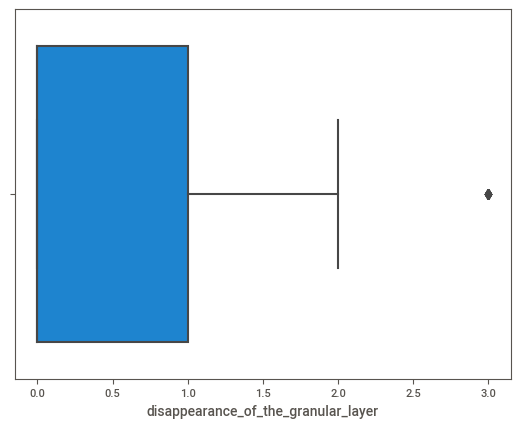

In [229]:
sns.boxplot(x='disappearance_of_the_granular_layer',data=data)

<AxesSubplot:xlabel='disappearance_of_the_granular_layer', ylabel='Count'>

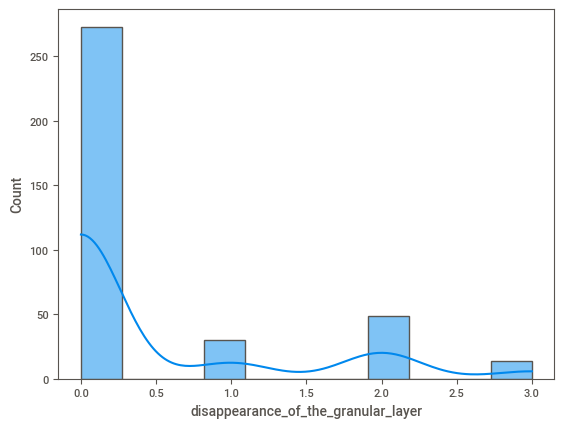

In [230]:
sns.histplot(x='disappearance_of_the_granular_layer',data=data,kde=True)

In [231]:
iqr=stats.iqr(data.disappearance_of_the_granular_layer,interpolation='midpoint')
print('iqr : ',iqr)

q1=data.disappearance_of_the_granular_layer.quantile(0.25)
print('q1 : ',q1)

q3=data.disappearance_of_the_granular_layer.quantile(0.75)
print('q3 : ',q3)

lowerlimit=q1-1.5*iqr
print('lowerlimit : ',lowerlimit)

upperlimit=q3+1.5*iqr
print('upperlimit : ',upperlimit)

iqr :  1.0
q1 :  0.0
q3 :  1.0
lowerlimit :  -1.5
upperlimit :  2.5


In [232]:
data.loc[data['disappearance_of_the_granular_layer']<lowerlimit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

In [233]:
data.loc[data['disappearance_of_the_granular_layer']>upperlimit]

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
3           2        2                 2        0                   0   
17          3        3                 3        0                   0   
66          2        2                 2        0                   0   
172         3        2                 3        0                   0   
194         3        2                 2        0                   0   
236         3        2                 3        2                   0   
244         2        1                 2        0                   0   
245         3        3                 3        0                   0   
293         2        2                 3        1                   0   
319         3        2                 2        0                   0   
330         2        1                 2        0                   0   
351         2        2                 2        3                   2   
355         2        3                 2        3                   2   
356         2        2                 2        2                   2   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
3                    0                   0                         0   
17                   0                   0                         0   
66                   0                   0                         0   
172                  0                   0                         0   
194                  0                   0                         0   
236                  0                   0                         0   
244                  0                   0                         0   
245                  0                   0                         0   
293                  0                   0                         0   
319                  0                   0                         0   
330                  0                   0                         0   
351                  0                   0                         0   
355                  0                   0                         0   
356                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  ...  \
3                             3                  2  ...   
17                            3                  0  ...   
66                            2                  2  ...   
172                           3                  0  ...   
194                           3                  0  ...   
236                           0                  2  ...   
244                           3                  2  ...   
245                           2                  0  ...   
293                           2                  2  ...   
319                           2                  2  ...   
330                           2                  0  ...   
351                           2                  0  ...   
355                           3                  2  ...   
356                           3                  0  ...   

     disappearance_of_the_granular_layer  \
3                                      3   
17                                     3   
66                                     3   
172                                    3   
194                                    3   
236                                    3   
244                                    3   
245                                    3   
293                                    3   
319                                    3   
330                                    3   
351                                    3   
355                                    3   
356                                    3   

     vacuolisation_and_damage_of_basal_layer  spongiosis  \
3                                          0           0   
17                                         0           0   
66                                         0           0   
172                                      

# vacuolisation_and_damage_of_basal_layer

In [234]:
data.vacuolisation_and_damage_of_basal_layer.unique()

array([0, 2, 3, 1], dtype=int64)

In [235]:
data.vacuolisation_and_damage_of_basal_layer.value_counts()

0    294
2     43
3     26
1      3
Name: vacuolisation_and_damage_of_basal_layer, dtype: int64

<AxesSubplot:xlabel='vacuolisation_and_damage_of_basal_layer'>

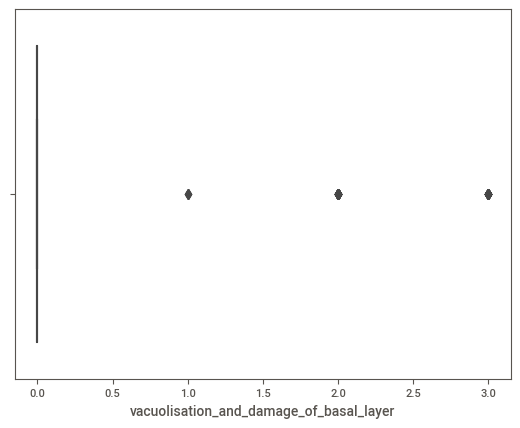

In [236]:
sns.boxplot(x='vacuolisation_and_damage_of_basal_layer',data=data)

<AxesSubplot:xlabel='vacuolisation_and_damage_of_basal_layer', ylabel='Count'>

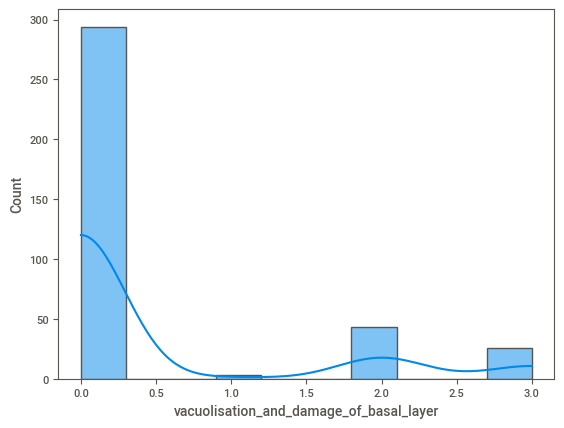

In [237]:
sns.histplot(x='vacuolisation_and_damage_of_basal_layer',data=data,kde=True)

In [238]:
iqr=stats.iqr(data.vacuolisation_and_damage_of_basal_layer,interpolation='midpoint')
print('iqr : ',iqr)

q1=data.vacuolisation_and_damage_of_basal_layer.quantile(0.25)
print('q1 : ',q1)

q3=data.vacuolisation_and_damage_of_basal_layer.quantile(0.75)
print('q3 : ',q3)

lowerlimit=q1-1.5*iqr
print('lowerlimit : ',lowerlimit)

upperlimit=q3+1.5*iqr
print('upperlimit : ',upperlimit)

iqr :  0.0
q1 :  0.0
q3 :  0.0
lowerlimit :  0.0
upperlimit :  0.0


In [239]:
data.loc[data['vacuolisation_and_damage_of_basal_layer']<lowerlimit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

In [240]:
data.loc[data['vacuolisation_and_damage_of_basal_layer']>upperlimit]

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
2           2        1                 2        3                   1   
4           2        3                 2        2                   2   
7           2        2                 3        3                   0   
14          2        2                 3        3                   0   
18          2        1                 3        3                   0   
23          2        2                 2        3                   2   
29          1        1                 2        3                   2   
36          2        1                 2        3                   2   
38          2        1                 2        3                   2   
45          2        1                 1        1                   1   
49          2        0                 1        0                   0   
50          3        1                 1        2                   2   
57          2        1                 1        3                   0   
65          3        2                 2        2                   0   
72          1        1                 1        1                   1   
78          0        0                 0        0                   0   
87          2        1                 2        1                   1   
94          2        1                 1        3                   2   
105         2        2                 2        2                   2   
108         2        2                 3        2                   1   
111         2        2                 2        3                   2   
113         2        2                 3        2                   0   
114         1        1                 1        2                   2   
117         2        2                 3        2                   2   
127         2        2                 2        2                   0   
132         3        2                 2        1                   0   
138         2        3                 2        3                   0   
144         1        1                 2        3                   2   
145         2        2                 3        3                   1   
155         2        1                 1        1                   0   
157         3        3                 2        2                   0   
162         3        2                 2        2                   0   
167         2        2                 3        3                   1   
169         2        2                 3        3                   1   
170         1        1                 2        3                   1   
174         3        2                 2        2                   0   
178         1        2                 2        2                   0   
179         2        2                 2        2                   0   
190         2        1                 2        3                   1   
191         2        3                 3        3                   0   
192         3        2                 2        2                   0   
196         3        2                 3        3                   1   
212         2        2                 2        3                   1   
213         2        2                 2        2                   1   
214         3        2                 3        2                   2   
215         2        3                 2        3                   0   
216         2        2                 3        2                   2   
217         3        2                 2        3                   0   
249         2        1                 1        2                   2   
250         2        2                 2        2                   0   
251         2        2                 2        2                   1   
252         2        2                 2        2                   1   
253         2        1                 2        2                   0   
254         3        1                 2        3              

# spongiosis

In [241]:
data.spongiosis.unique()

array([3, 0, 2, 1], dtype=int64)

In [242]:
data.spongiosis.value_counts()

0    199
2     96
3     43
1     28
Name: spongiosis, dtype: int64

<AxesSubplot:xlabel='spongiosis'>

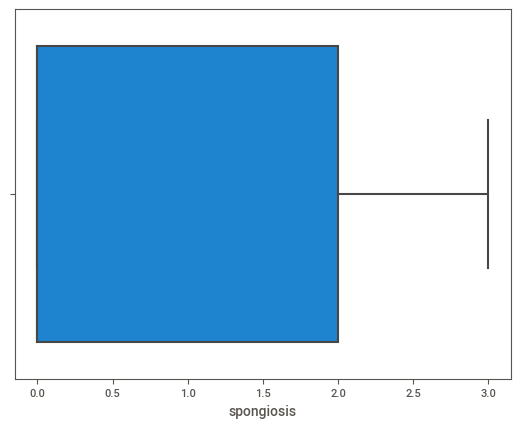

In [243]:
sns.boxplot(x='spongiosis',data=data)

<AxesSubplot:xlabel='spongiosis', ylabel='Count'>

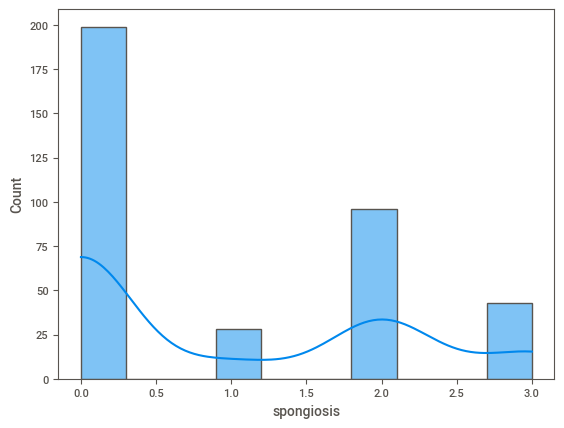

In [244]:
sns.histplot(x='spongiosis',data=data,kde=True)

In [245]:
iqr=stats.iqr(data.spongiosis,interpolation='midpoint')
print('iqr : ',iqr)

q1=data.spongiosis.quantile(0.25)
print('q1 : ',q1)

q3=data.spongiosis.quantile(0.75)
print('q3 : ',q3)

lowerlimit=q1-1.5*iqr
print('lowerlimit : ',lowerlimit)

upperlimit=q3+1.5*iqr
print('upperlimit : ',upperlimit)

iqr :  2.0
q1 :  0.0
q3 :  2.0
lowerlimit :  -3.0
upperlimit :  5.0


In [246]:
data.loc[data['spongiosis']<lowerlimit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

In [247]:
data.loc[data['spongiosis']>upperlimit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

# saw-tooth_appearance_of_retes

In [248]:
data['saw-tooth_appearance_of_retes'].unique()

array([0, 2, 3, 1], dtype=int64)

In [249]:
data["saw-tooth_appearance_of_retes"].value_counts()

0    294
2     40
3     27
1      5
Name: saw-tooth_appearance_of_retes, dtype: int64

<AxesSubplot:xlabel='saw-tooth_appearance_of_retes'>

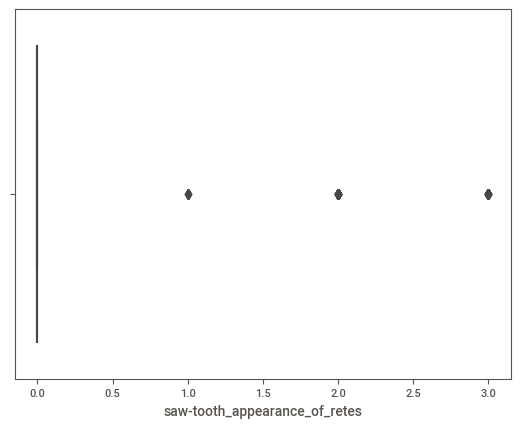

In [250]:
sns.boxplot(x='saw-tooth_appearance_of_retes',data=data)

<AxesSubplot:xlabel='saw-tooth_appearance_of_retes', ylabel='Count'>

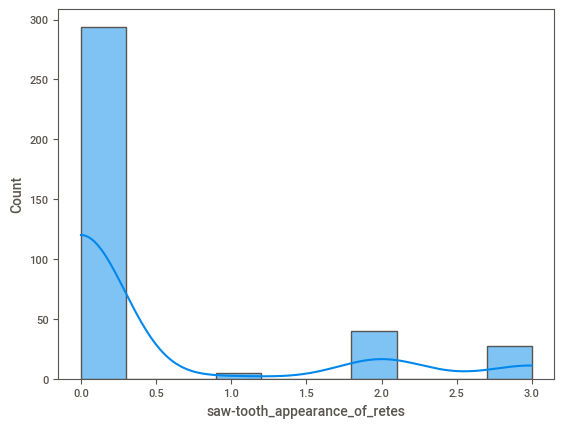

In [251]:
sns.histplot(x='saw-tooth_appearance_of_retes',data=data,kde=True)

In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

In [253]:
iqr=stats.iqr(data['saw-tooth_appearance_of_retes'],interpolation='midpoint')
print('iqr : ',iqr)

q1=data['saw-tooth_appearance_of_retes'].quantile(0.25)
print('q1 : ',q1)

q3=data['saw-tooth_appearance_of_retes'].quantile(0.75)
print('q3 : ',q3)

lowerlimit=q1-1.5*iqr
print('lowerlimit : ',lowerlimit)

upperlimit=q3+1.5*iqr
print('upperlimit : ',upperlimit)

iqr :  0.0
q1 :  0.0
q3 :  0.0
lowerlimit :  0.0
upperlimit :  0.0


In [254]:
data.loc[data['saw-tooth_appearance_of_retes']<lowerlimit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

In [255]:
data.loc[data['saw-tooth_appearance_of_retes']>upperlimit]

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
2           2        1                 2        3                   1   
4           2        3                 2        2                   2   
7           2        2                 3        3                   0   
14          2        2                 3        3                   0   
18          2        1                 3        3                   0   
23          2        2                 2        3                   2   
29          1        1                 2        3                   2   
36          2        1                 2        3                   2   
38          2        1                 2        3                   2   
45          2        1                 1        1                   1   
49          2        0                 1        0                   0   
50          3        1                 1        2                   2   
51          1        1                 1        0                   2   
57          2        1                 1        3                   0   
65          3        2                 2        2                   0   
72          1        1                 1        1                   1   
78          0        0                 0        0                   0   
87          2        1                 2        1                   1   
94          2        1                 1        3                   2   
108         2        2                 3        2                   1   
111         2        2                 2        3                   2   
113         2        2                 3        2                   0   
114         1        1                 1        2                   2   
117         2        2                 3        2                   2   
127         2        2                 2        2                   0   
132         3        2                 2        1                   0   
138         2        3                 2        3                   0   
143         2        1                 1        3                   2   
144         1        1                 2        3                   2   
145         2        2                 3        3                   1   
155         2        1                 1        1                   0   
157         3        3                 2        2                   0   
162         3        2                 2        2                   0   
169         2        2                 3        3                   1   
170         1        1                 2        3                   1   
174         3        2                 2        2                   0   
178         1        2                 2        2                   0   
179         2        2                 2        2                   0   
190         2        1                 2        3                   1   
191         2        3                 3        3                   0   
192         3        2                 2        2                   0   
196         3        2                 3        3                   1   
212         2        2                 2        3                   1   
213         2        2                 2        2                   1   
214         3        2                 3        2                   2   
215         2        3                 2        3                   0   
216         2        2                 3        2                   2   
217         3        2                 2        3                   0   
249         2        1                 1        2                   2   
250         2        2                 2        2                   0   
251         2        2                 2        2                   1   
252         2        2                 2        2                   1   
253         2        1                 2        2                   0   
254         3        1                 2        3              

# follicular_horn_plug

In [256]:
data.follicular_horn_plug.unique()

array([0, 1, 2, 3], dtype=int64)

In [257]:
data.follicular_horn_plug.value_counts()

0    344
1     10
2      8
3      4
Name: follicular_horn_plug, dtype: int64

<AxesSubplot:xlabel='follicular_horn_plug'>

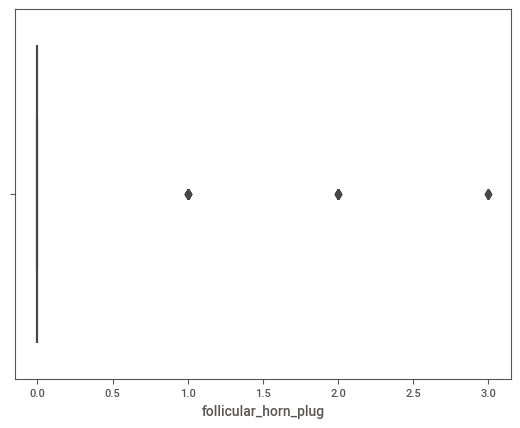

In [258]:
sns.boxplot(x='follicular_horn_plug',data=data)

<AxesSubplot:xlabel='follicular_horn_plug', ylabel='Count'>

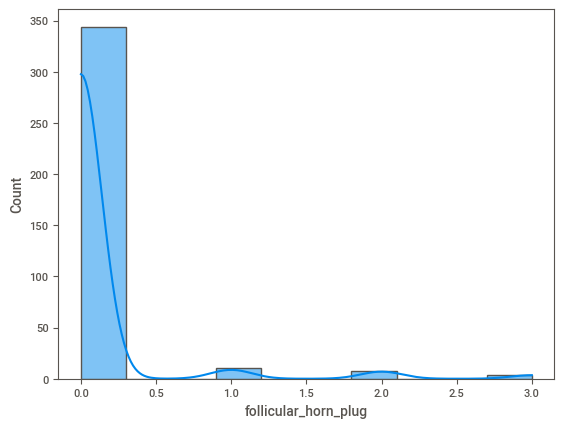

In [259]:
sns.histplot(x='follicular_horn_plug',data=data,kde=True)

In [260]:
iqr=stats.iqr(data.follicular_horn_plug,interpolation='midpoint')
print('iqr : ',iqr)

q1=data.follicular_horn_plug.quantile(0.25)
print('q1 : ',q1)

q3=data.follicular_horn_plug.quantile(0.75)
print('q3 : ',q3)

lowerlimit=q1-1.5*iqr
print('lowerlimit : ',lowerlimit)

upperlimit=q3+1.5*iqr
print('upperlimit : ',upperlimit)

iqr :  0.0
q1 :  0.0
q3 :  0.0
lowerlimit :  0.0
upperlimit :  0.0


In [261]:
data.loc[data['follicular_horn_plug']<lowerlimit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

In [262]:
data.loc[data['follicular_horn_plug']>upperlimit]

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
20          2        1                 1        2                   0   
22          2        2                 0        2                   0   
26          1        1                 0        1                   0   
28          3        2                 2        2                   0   
29          1        1                 2        3                   2   
60          2        2                 1        1                   0   
71          2        1                 2        0                   0   
99          2        2                 1        0                   0   
122         1        1                 2        0                   0   
126         2        2                 2        0                   0   
163         2        2                 0        0                   0   
184         2        2                 1        0                   0   
239         2        2                 2        1                   0   
240         3        2                 0        0                   0   
266         2        2                 1        1                   0   
267         3        2                 0        1                   0   
268         2        2                 1        1                   0   
343         2        2                 2        0                   0   
344         2        2                 1        0                   0   
347         2        2                 0        1                   0   
348         3        2                 2        0                   0   
349         2        2                 1        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
20                   0                   3                         0   
22                   0                   0                         0   
26                   0                   3                         0   
28                   0                   0                         0   
29                   2                   0                         3   
60                   0                   1                         0   
71                   0                   3                         0   
99                   0                   2                         0   
122                  0                   3                         0   
126                  0                   2                         0   
163                  0                   2                         0   
184                  0                   3                         0   
239                  0                   2                         0   
240                  0                   2                         0   
266                  0                   2                         0   
267                  0                   2                         0   
268                  0                   2                         0   
343                  0                   1                         0   
344                  0                   2                         0   
347                  0                   2                         0   
348                  0                   3                         0   
349                  0                   2                         0   

     knee_and_elbow_involvement  scalp_involvement  ...  \
20                            1                  2  ...   
22                            0                  0  ...   
26                            1                  0  ...   
28                            0                  0  ...   
29                            0                  0  ...   
60                            1                  1  ...   
71                            3                  0  ...   
99                            2                  0  ...   
122                           3                  0  ...   
126                           2                  0  ...   
163                

# perifollicular_parakeratosis

In [263]:
data.perifollicular_parakeratosis.unique()

array([0, 2, 1, 3], dtype=int64)

In [264]:
data.perifollicular_parakeratosis.value_counts()

0    345
2     13
1      4
3      4
Name: perifollicular_parakeratosis, dtype: int64

<AxesSubplot:xlabel='perifollicular_parakeratosis'>

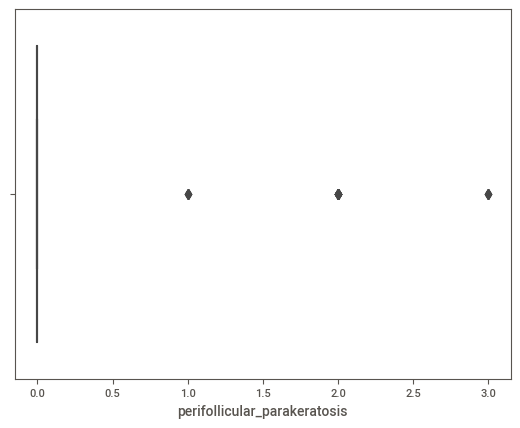

In [265]:
sns.boxplot(x='perifollicular_parakeratosis',data=data)

<AxesSubplot:xlabel='perifollicular_parakeratosis', ylabel='Count'>

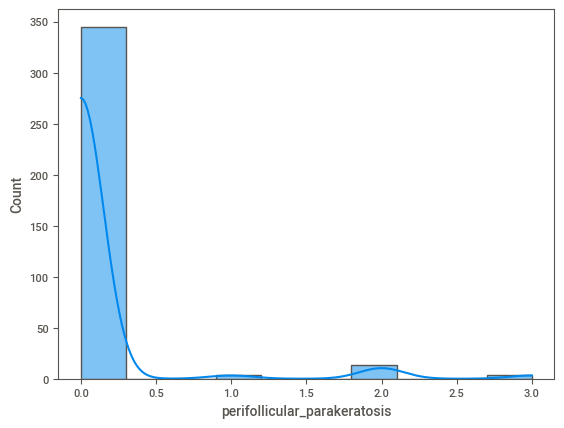

In [266]:
sns.histplot(x='perifollicular_parakeratosis',data=data,kde=True)

In [267]:
iqr=stats.iqr(data.perifollicular_parakeratosis,interpolation='midpoint')
print('iqr : ',iqr)

q1=data.perifollicular_parakeratosis.quantile(0.25)
print('q1 : ',q1)

q3=data.perifollicular_parakeratosis.quantile(0.75)
print('q3 : ',q3)

lowerlimit=q1-1.5*iqr
print('lowerlimit : ',lowerlimit)

upperlimit=q3+1.5*iqr
print('upperlimit : ',upperlimit)

iqr :  0.0
q1 :  0.0
q3 :  0.0
lowerlimit :  0.0
upperlimit :  0.0


In [268]:
data.loc[data['perifollicular_parakeratosis']<lowerlimit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

In [269]:
data.loc[data['perifollicular_parakeratosis']>upperlimit]

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
20          2        1                 1        2                   0   
26          1        1                 0        1                   0   
28          3        2                 2        2                   0   
47          2        1                 1        1                   0   
60          2        2                 1        1                   0   
71          2        1                 2        0                   0   
99          2        2                 1        0                   0   
122         1        1                 2        0                   0   
126         2        2                 2        0                   0   
163         2        2                 0        0                   0   
184         2        2                 1        0                   0   
239         2        2                 2        1                   0   
240         3        2                 0        0                   0   
266         2        2                 1        1                   0   
267         3        2                 0        1                   0   
268         2        2                 1        1                   0   
343         2        2                 2        0                   0   
344         2        2                 1        0                   0   
347         2        2                 0        1                   0   
348         3        2                 2        0                   0   
349         2        2                 1        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
20                   0                   3                         0   
26                   0                   3                         0   
28                   0                   0                         0   
47                   0                   2                         0   
60                   0                   1                         0   
71                   0                   3                         0   
99                   0                   2                         0   
122                  0                   3                         0   
126                  0                   2                         0   
163                  0                   2                         0   
184                  0                   3                         0   
239                  0                   2                         0   
240                  0                   2                         0   
266                  0                   2                         0   
267                  0                   2                         0   
268                  0                   2                         0   
343                  0                   1                         0   
344                  0                   2                         0   
347                  0                   2                         0   
348                  0                   3                         0   
349                  0                   2                         0   

     knee_and_elbow_involvement  scalp_involvement  ...  \
20                            1                  2  ...   
26                            1                  0  ...   
28                            0                  0  ...   
47                            3                  2  ...   
60                            1                  1  ...   
71                            3                  0  ...   
99                            2                  0  ...   
122                           3                  0  ...   
126                           2                  0  ...   
163                           1                  1  ...   
184                           2                  0  ...   
239                           2                  2  ...   
240                           2               

# inflammatory_monoluclear_inflitrate

In [270]:
data.inflammatory_monoluclear_inflitrate.unique()

array([1, 2, 3, 0], dtype=int64)

In [271]:
data.inflammatory_monoluclear_inflitrate.value_counts()

2    206
1     85
3     62
0     13
Name: inflammatory_monoluclear_inflitrate, dtype: int64

<AxesSubplot:xlabel='inflammatory_monoluclear_inflitrate'>

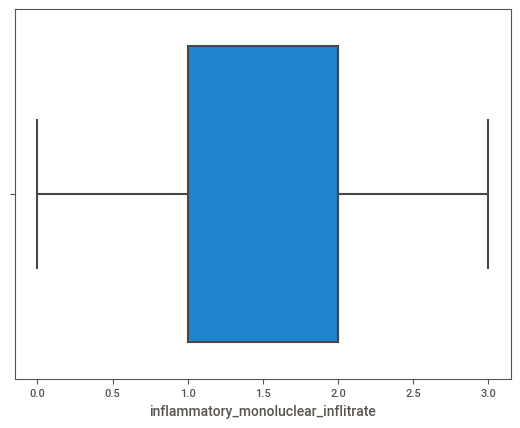

In [272]:
sns.boxplot(x='inflammatory_monoluclear_inflitrate',data=data)

<AxesSubplot:xlabel='inflammatory_monoluclear_inflitrate', ylabel='Count'>

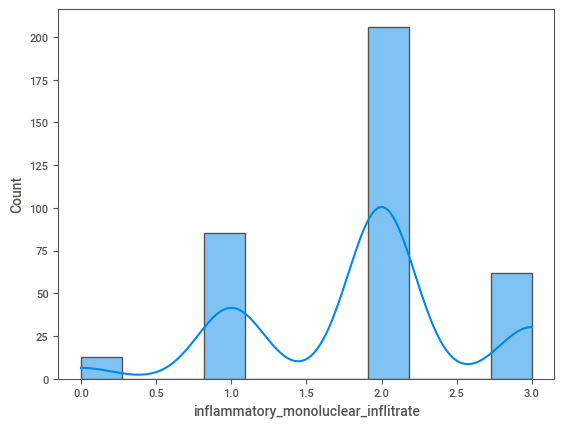

In [273]:
sns.histplot(x='inflammatory_monoluclear_inflitrate',data=data,kde=True)

In [274]:
iqr=stats.iqr(data.inflammatory_monoluclear_inflitrate,interpolation='midpoint')
print('iqr : ',iqr)

q1=data.inflammatory_monoluclear_inflitrate.quantile(0.25)
print('q1 : ',q1)

q3=data.inflammatory_monoluclear_inflitrate.quantile(0.75)
print('q3 : ',q3)

lowerlimit=q1-1.5*iqr
print('lowerlimit : ',lowerlimit)

upperlimit=q3+1.5*iqr
print('upperlimit : ',upperlimit)

iqr :  1.0
q1 :  1.0
q3 :  2.0
lowerlimit :  -0.5
upperlimit :  3.5


In [275]:
data.loc[data['inflammatory_monoluclear_inflitrate']<lowerlimit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

In [276]:
data.loc[data['inflammatory_monoluclear_inflitrate']>upperlimit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

# band-like_infiltrate

In [277]:
data['band-like_infiltrate'].unique()

array([0, 3, 1, 2], dtype=int64)

In [278]:
data['band-like_infiltrate'].value_counts()

0    289
3     52
2     22
1      3
Name: band-like_infiltrate, dtype: int64

<AxesSubplot:xlabel='band-like_infiltrate'>

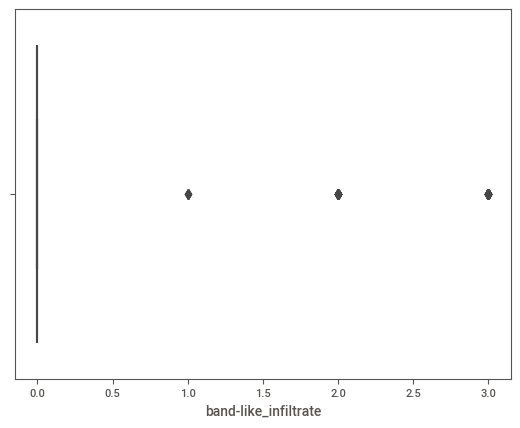

In [279]:
sns.boxplot(x='band-like_infiltrate',data=data)

<AxesSubplot:xlabel='band-like_infiltrate', ylabel='Count'>

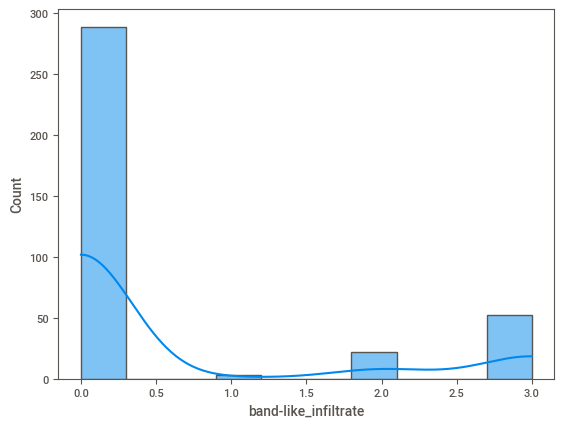

In [280]:
sns.histplot(x='band-like_infiltrate',data=data,kde=True)

In [281]:
iqr=stats.iqr(data['band-like_infiltrate'],interpolation='midpoint')
print('iqr : ',iqr)

q1=data['band-like_infiltrate'].quantile(0.25)
print('q1 : ',q1)

q3=data['band-like_infiltrate'].quantile(0.75)
print('q3 : ',q3)

lowerlimit=q1-1.5*iqr
print('lowerlimit : ',lowerlimit)

upperlimit=q3+1.5*iqr
print('upperlimit : ',upperlimit)

iqr :  0.0
q1 :  0.0
q3 :  0.0
lowerlimit :  0.0
upperlimit :  0.0


In [282]:
data.loc[data['band-like_infiltrate']<lowerlimit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

In [283]:
data.loc[data['band-like_infiltrate']>upperlimit]

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
2           2        1                 2        3                   1   
4           2        3                 2        2                   2   
7           2        2                 3        3                   0   
14          2        2                 3        3                   0   
18          2        1                 3        3                   0   
23          2        2                 2        3                   2   
29          1        1                 2        3                   2   
36          2        1                 2        3                   2   
38          2        1                 2        3                   2   
45          2        1                 1        1                   1   
47          2        1                 1        1                   0   
48          1        2                 1        1                   0   
49          2        0                 1        0                   0   
50          3        1                 1        2                   2   
57          2        1                 1        3                   0   
65          3        2                 2        2                   0   
72          1        1                 1        1                   1   
78          0        0                 0        0                   0   
87          2        1                 2        1                   1   
94          2        1                 1        3                   2   
108         2        2                 3        2                   1   
109         3        2                 1        2                   2   
111         2        2                 2        3                   2   
113         2        2                 3        2                   0   
114         1        1                 1        2                   2   
117         2        2                 3        2                   2   
119         1        1                 1        1                   1   
127         2        2                 2        2                   0   
132         3        2                 2        1                   0   
138         2        3                 2        3                   0   
143         2        1                 1        3                   2   
144         1        1                 2        3                   2   
145         2        2                 3        3                   1   
155         2        1                 1        1                   0   
157         3        3                 2        2                   0   
162         3        2                 2        2                   0   
167         2        2                 3        3                   1   
169         2        2                 3        3                   1   
170         1        1                 2        3                   1   
174         3        2                 2        2                   0   
178         1        2                 2        2                   0   
179         2        2                 2        2                   0   
190         2        1                 2        3                   1   
191         2        3                 3        3                   0   
192         3        2                 2        2                   0   
196         3        2                 3        3                   1   
204         2        2                 0        2                   0   
212         2        2                 2        3                   1   
213         2        2                 2        2                   1   
214         3        2                 3        2                   2   
215         2        3                 2        3                   0   
216         2        2                 3        2                   2   
217         3        2                 2        3                   0   
249         2        1                 1        2              

# Age

In [284]:
data.Age.unique()

array(['55', '8', '26', '40', '45', '41', '18', '57', '22', '30', '20',
       '21', '10', '65', '38', '23', '17', '51', '42', '44', '33', '43',
       '50', '34', 45, '15', '46', '62', '35', '48', '12', '52', '60',
       '32', '19', '29', '25', '36', '13', '27', '31', '28', '64', '39',
       '47', '16', '0', '7', '70', '37', '61', '67', '56', '53', '24',
       '58', '49', '63', '68', '9', '75'], dtype=object)

In [285]:
data.Age.value_counts()

40    17
50    17
36    16
27    16
22    15
35    14
25    14
55    14
30    13
33    12
60    11
52    11
42    10
18     9
45     8
34     8
20     8
51     7
45     7
62     7
8      7
10     7
19     6
32     6
47     6
46     6
17     5
44     5
16     5
28     5
56     5
48     5
70     4
43     4
7      4
41     4
12     3
29     3
23     3
26     3
38     3
21     3
57     2
9      2
24     2
53     2
61     2
13     2
37     2
65     2
39     2
31     2
15     2
0      1
67     1
64     1
58     1
49     1
63     1
68     1
75     1
Name: Age, dtype: int64

<AxesSubplot:xlabel='itching', ylabel='class'>

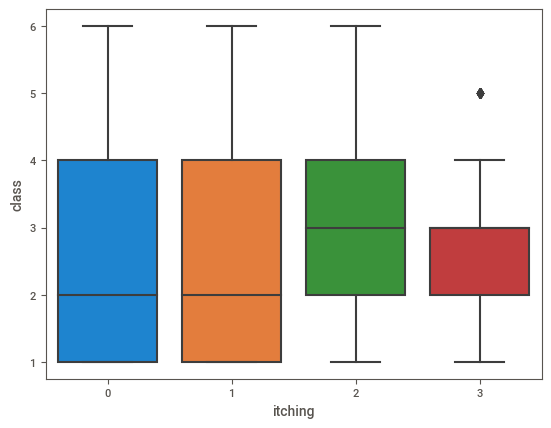

In [286]:
sns.boxplot(x='itching',y='class',data=data)

<AxesSubplot:xlabel='itching', ylabel='Count'>

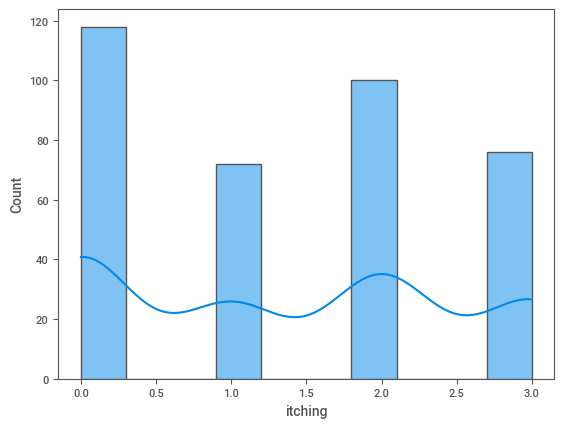

In [287]:
sns.histplot(x='itching',data=data,kde=True)

In [288]:
data['Age']=data['Age'].astype('int64')

In [289]:
iqr=stats.iqr(data.Age,interpolation='midpoint')
print('iqr : ',iqr)

q1=data.Age.quantile(0.25)
print('q1 : ',q1)

q3=data.Age.quantile(0.75)
print('q3 : ',q3)

lowerlimit=q1-1.5*iqr
print('lowerlimit : ',lowerlimit)

upperlimit=q3+1.5*iqr
print('upperlimit : ',upperlimit)

iqr :  23.0
q1 :  25.0
q3 :  48.0
lowerlimit :  -9.5
upperlimit :  82.5


In [290]:
data.loc[data['Age']<lowerlimit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

In [291]:
data.loc[data['Age']>upperlimit]


Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

# Feature Engineering

In [292]:
data.corr()

erythema   scaling  \
erythema                                  1.000000  0.435467   
scaling                                   0.435467  1.000000   
definite_borders                          0.260087  0.357987   
itching                                  -0.047623 -0.084197   
koebner_phenomenon                       -0.012035 -0.071456   
polygonal_papules                         0.033571 -0.075035   
follicular_papules                       -0.109550 -0.092400   
oral_mucosal_involvement                 -0.026810 -0.082969   
knee_and_elbow_involvement                0.141008  0.298398   
scalp_involvement                         0.163585  0.270328   
family_history                            0.172059  0.181491   
melanin_incontinence                      0.042126 -0.074856   
eosinophils_in_the_infiltrate             0.075228  0.042211   
PNL_infiltrate                            0.224095  0.282486   
fibrosis_of_the_papillary_dermis         -0.354595 -0.383585   
exocytosis                                0.021565 -0.110809   
acanthosis                                0.064165  0.108095   
hyperkeratosis                           -0.106739 -0.019632   
parakeratosis                             0.210030  0.296752   
clubbing_of_the_rete_ridges               0.157558  0.320740   
elongation_of_the_rete_ridges             0.007819  0.139073   
thinning_of_the_suprapapillary_epidermis  0.167868  0.330343   
spongiform_pustule                        0.169773  0.297783   
munro_microabcess                         0.113464  0.186366   
focal_hypergranulosis                    -0.013761 -0.085021   
disappearance_of_the_granular_layer       0.159100  0.211484   
vacuolisation_and_damage_of_basal_layer   0.002559 -0.109523   
spongiosis                                0.022468  0.012151   
saw-tooth_appearance_of_retes            -0.005779 -0.114467   
follicular_horn_plug                     -0.005450 -0.010518   
perifollicular_parakeratosis              0.009539 -0.011135   
inflammatory_monoluclear_inflitrate       0.075758 -0.010977   
band-like_infiltrate                     -0.006955 -0.132079   
Age                                      -0.013321  0.006028   
class                                    -0.335537 -0.468688   

                                          definite_borders   itching  \
erythema                                          0.260087 -0.047623   
scaling                                           0.357987 -0.084197   
definite_borders                                  1.000000 -0.062564   
itching                                          -0.062564  1.000000   
koebner_phenomenon                                0.184789  0.139461   
polygonal_papules                                 0.327754  0.409696   
follicular_papules                               -0.166662 -0.144825   
oral_mucosal_involvement                          0.286684  0.359163   
knee_and_elbow_involvement                        0.302309 -0.299645   
scalp_involvement                                 0.204542 -0.172766   
family_history                                    0.115844 -0.136615   
melanin_incontinence                              0.311398  0.359207   
eosinophils_in_the_infiltrate                    -0.132021  0.095434   
PNL_infiltrate                                    0.041330 -0.145288   
fibrosis_of_the_papillary_dermis                 -0.274414  0.203032   
exocytosis                                       -0.205391  0.214822   
acanthosis                                        0.189761  0.067080   
hyperkeratosis                                    0.018282 -0.021178   
parakeratosis                                     0.361213 -0.075568   
clubbing_of_the_rete_ridges                       0.387205 -0.232224   
elongation_of_the_rete_ridges                     0.201702 -0.124058   
thinning_of_the_suprapapillary_epidermis          0.369266 -0.244052   
spongiform_pustule                                0.246204 -0.152689   
munro_mic

<AxesSubplot:>

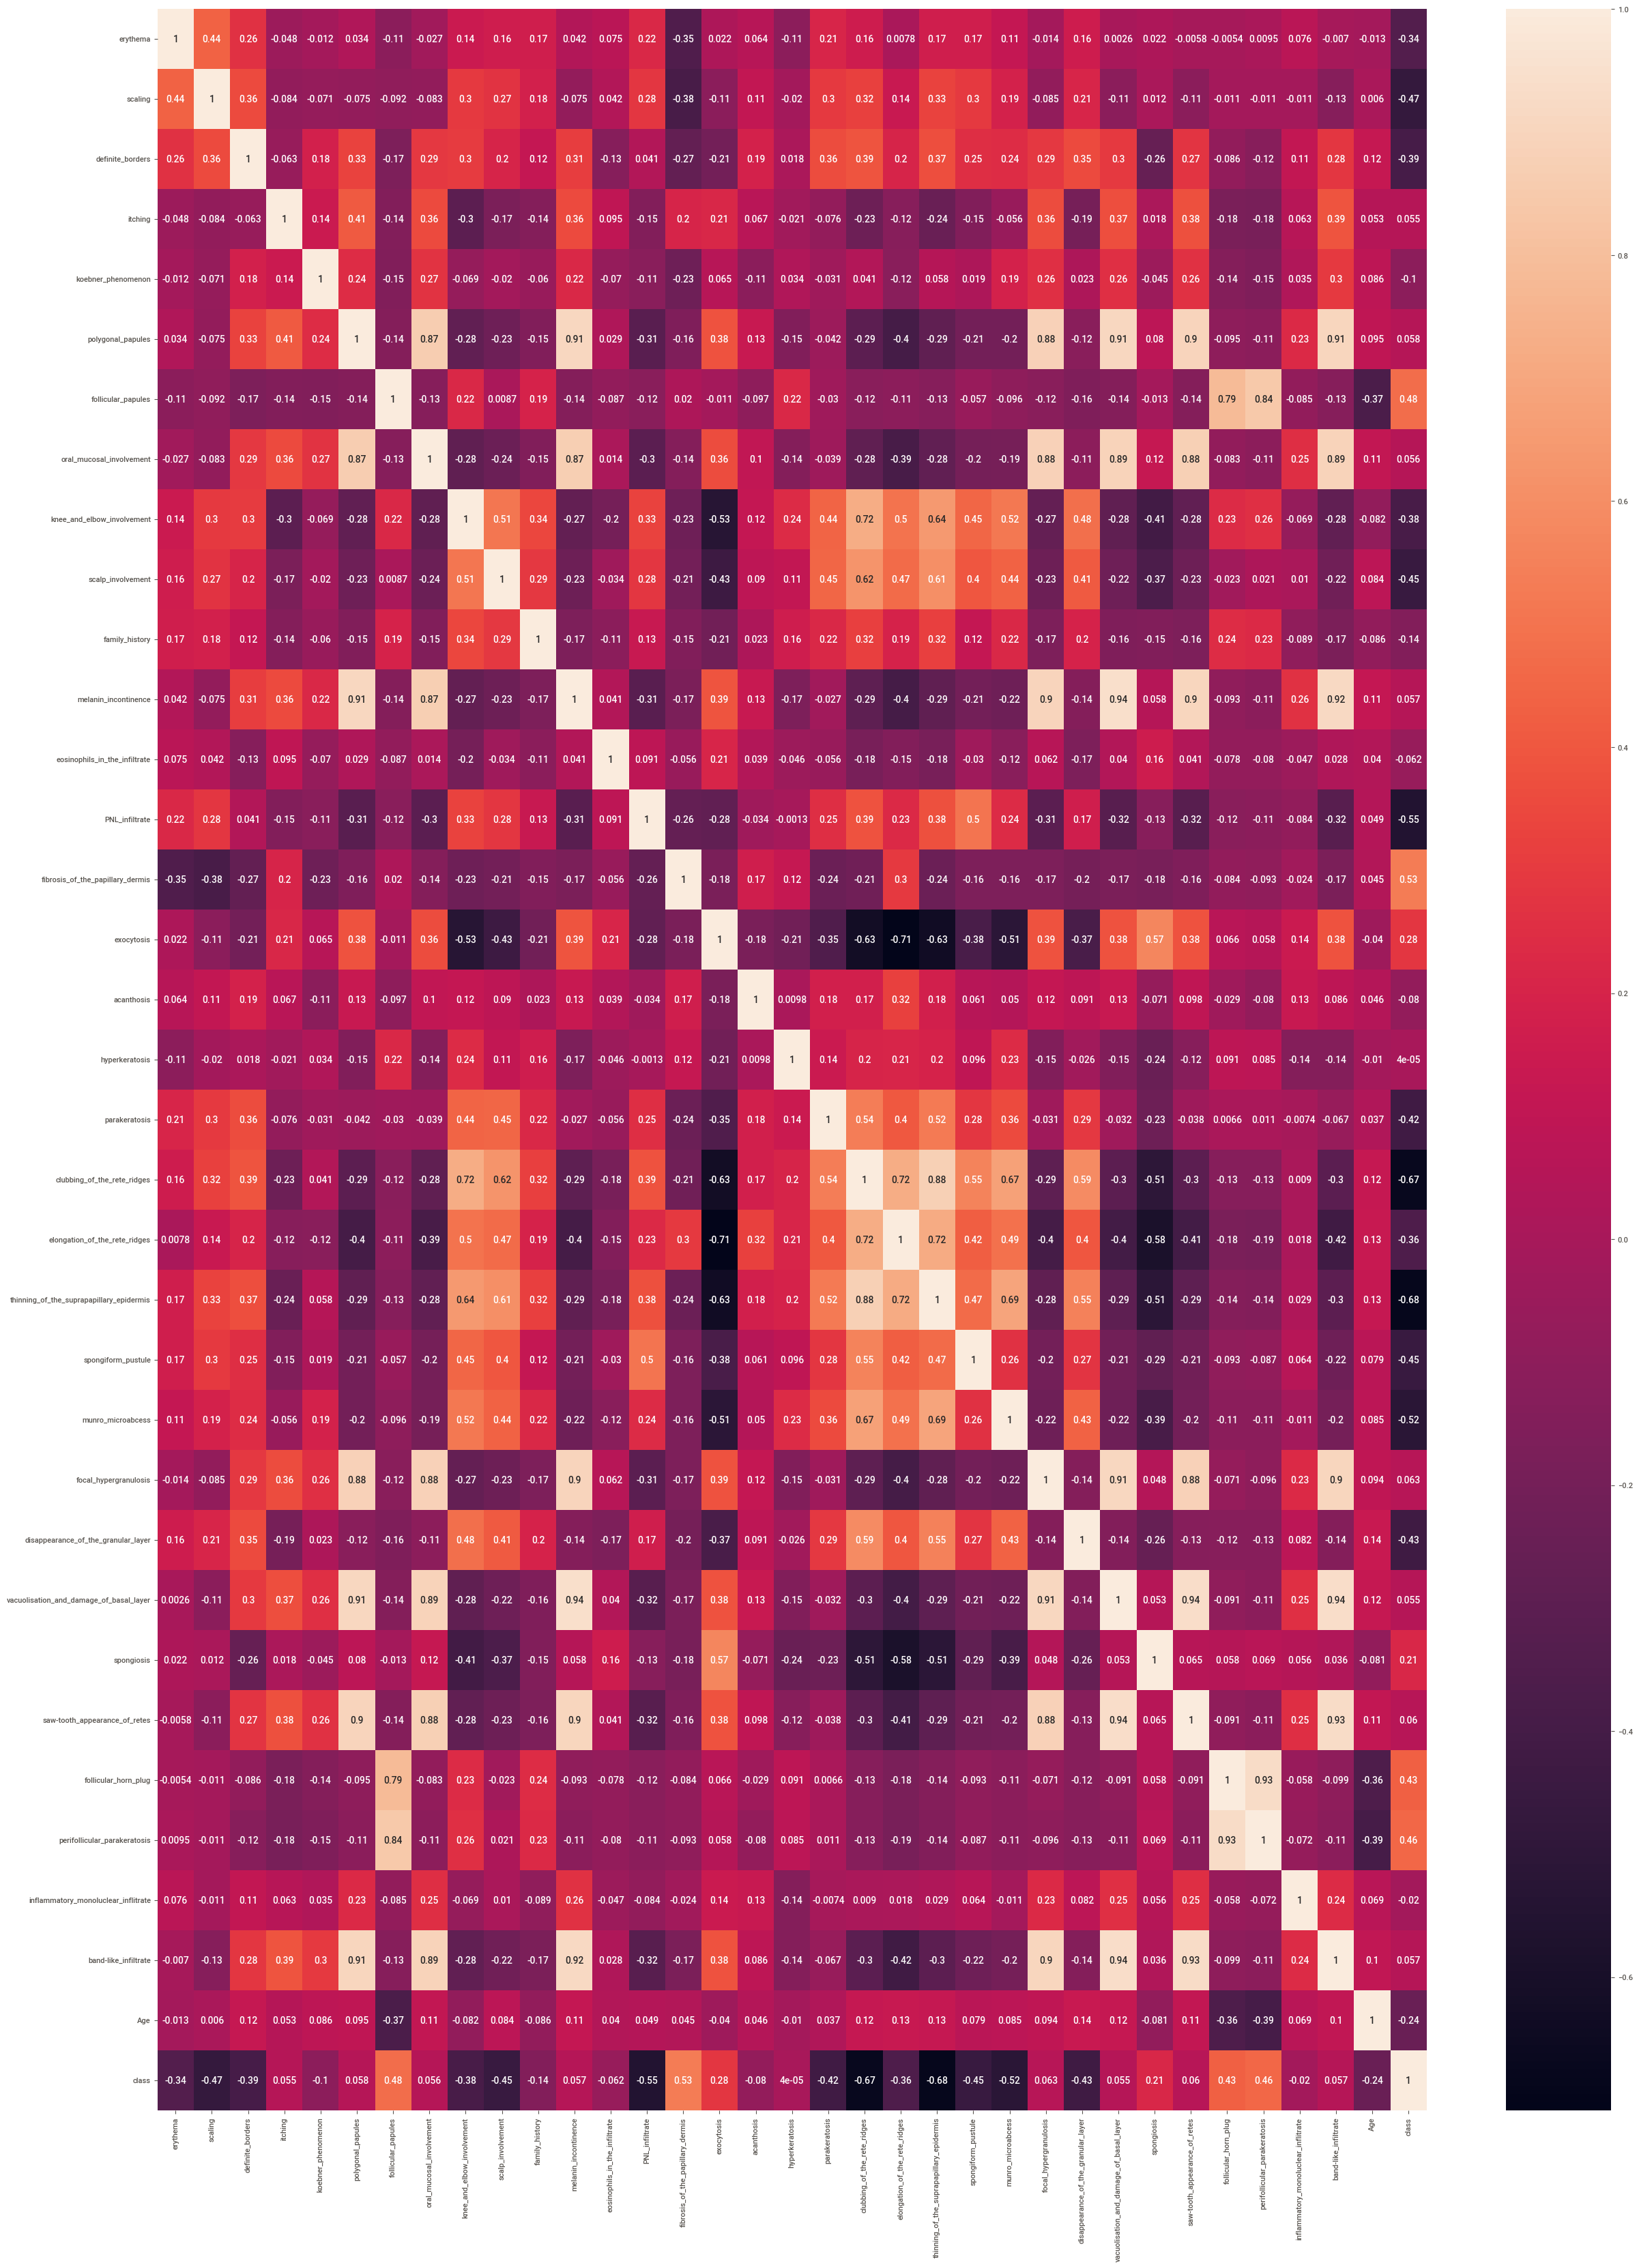

In [293]:
plt.figure(figsize=(30,40))
sns.heatmap(data.corr(),annot=True)

### polygonal_papaules:
- oral_mucosal_involvement
- melanin incontinence
- focal_hypergranulosis
- vaculisation_and_damage_of_basal_layer
- band_like_infiltrate


### follicular_papules:
   - parafollicular_parakeratosis
    
### oral_mucosal_involvement:
   - polygonal_papules
   - melanin_incontinence
   - focal_hypergranulosis
   - vaculisation_and_damage_of_basal_layer
   - saw-tooth-appearance of rates
   - band-like infiltrate
    
### focal_hypergranulosis:
   - polygonal_papules - 88%
   - oral_mucosal_invovlement - 88%
   - vaculisation_and_damage_of_basal_layer -91%
   - saw-tooth-appearance of rates - 88%
    
### vaculisation_and_damage_of_basal_layer:
   - polygonal_papules - 91%
   - oral_mucosal_invovlement - 89%
   - melanin_incontinence - 94%
   - focal_hypergranulosis- 91%
   - saw-tooth-appearance of rates- 91%
   - band-like infiltrate-94%

### saw-tooth-appearance of rates:
   - oral_mucosal_invovlement- 88%
   - focal_hypergranulosis - 88%
   - vaculisation_and_damage_of_basal_layer -94%
   - band-like infiltrate- 93%

### follicular_horn_plug:
   - peifollicular_keratosis
    
### band_like_infiltrate:
   - polygonal_papules - 91%
   - oral_mucosal_invovlement- 89%
   - melanin_incontinence- 92%
   - vaculisation_and_damage_of_basal_layer- 94%
   - saw-tooth appearance of rates- 95%

In [294]:
data.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')

In [295]:
data.drop(['polygonal_papules','oral_mucosal_involvement','melanin_incontinence','vacuolisation_and_damage_of_basal_layer',
          'saw-tooth_appearance_of_retes','perifollicular_parakeratosis','band-like_infiltrate','focal_hypergranulosis',
          ],axis=1,inplace=True)

In [296]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   erythema                                  366 non-null    int64
 1   scaling                                   366 non-null    int64
 2   definite_borders                          366 non-null    int64
 3   itching                                   366 non-null    int64
 4   koebner_phenomenon                        366 non-null    int64
 5   follicular_papules                        366 non-null    int64
 6   knee_and_elbow_involvement                366 non-null    int64
 7   scalp_involvement                         366 non-null    int64
 8   family_history                            366 non-null    int64
 9   eosinophils_in_the_infiltrate             366 non-null    int64
 10  PNL_infiltrate                            366 non-null    int6

In [297]:
data.shape

(366, 27)

# Task 2: -Create a predictive model using machine learning techniques to predict the various classes of skin disease.

# Spliting Data

In [298]:
x=data.drop('class',axis=1)

In [299]:
y=data['class']

In [300]:
x

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0           2        2                 0        3                   0   
1           3        3                 3        2                   1   
2           2        1                 2        3                   1   
3           2        2                 2        0                   0   
4           2        3                 2        2                   2   
5           2        3                 2        0                   0   
6           2        1                 0        2                   0   
7           2        2                 3        3                   0   
8           2        2                 1        0                   2   
9           2        2                 1        0                   1   
10          3        3                 2        1                   1   
11          2        2                 0        3                   0   
12          3        3                 1        2                   0   
13          2        3                 3        0                   0   
14          2        2                 3        3                   0   
15          1        1                 0        1                   0   
16          2        2                 1        3                   0   
17          3        3                 3        0                   0   
18          2        1                 3        3                   0   
19          1        1                 0        3                   0   
20          2        1                 1        2                   0   
21          3        2                 2        0                   0   
22          2        2                 0        2                   0   
23          2        2                 2        3                   2   
24          2        0                 0        3                   0   
25          2        1                 1        0                   1   
26          1        1                 0        1                   0   
27          1        2                 2        3                   0   
28          3        2                 2        2                   0   
29          1        1                 2        3                   2   
30          3        2                 1        2                   0   
31          3        2                 0        2                   0   
32          2        3                 3        3                   0   
33          2        2                 1        0                   0   
34          2        1                 0        0                   2   
35          2        2                 1        2                   0   
36          2        1                 2        3                   2   
37          2        1                 1        1                   0   
38          2        1                 2        3                   2   
39          3        3                 2        0                   0   
40          1        1                 1        0                   0   
41          1        1                 1        0                   0   
42          3        2                 1        1                   0   
43          2        1                 1        0                   0   
44          0        1                 0        3                   0   
45          2        1                 1        1                   1   
46          2        1                 1        3                   0   
47          2        1                 1        1                   0   
48          1        2                 1        1                   0   
49          2        0                 1        0                   0   
50          3        1                 1        2                   2   
51          1        1                 1        0                   2   
52          2        2                 1        0                   0   
53          3        1                 1        1              

In [301]:
y

0      2
1      1
2      3
3      1
4      3
5      2
6      5
7      3
8      4
9      4
10     1
11     2
12     2
13     1
14     3
15     4
16     2
17     1
18     3
19     5
20     6
21     2
22     5
23     3
24     5
25     1
26     6
27     5
28     2
29     3
30     1
31     2
32     1
33     1
34     4
35     2
36     3
37     2
38     3
39     1
40     2
41     4
42     1
43     2
44     5
45     3
46     4
47     6
48     2
49     3
50     3
51     4
52     1
53     1
54     5
55     1
56     2
57     3
58     4
59     2
60     6
61     1
62     5
63     1
64     2
65     3
66     1
67     4
68     5
69     1
70     2
71     6
72     3
73     5
74     4
75     2
76     2
77     1
78     3
79     5
80     1
81     2
82     2
83     2
84     5
85     1
86     1
87     3
88     1
89     4
90     2
91     2
92     5
93     1
94     3
95     4
96     2
97     5
98     1
99     6
100    2
101    5
102    1
103    2
104    2
105    1
106    4
107    1
108    3
109    1
110    1
1

In [302]:
from sklearn.model_selection import train_test_split

In [303]:
x_test,x_train,y_test,y_train=train_test_split(x,y,random_state=2,test_size=0.75)

In [304]:
y_test.value_counts().sum()

91

In [305]:
y.value_counts()

1    112
3     72
2     61
5     52
4     49
6     20
Name: class, dtype: int64

# smote

In [306]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [307]:
x_smote,y_smote=smote.fit_resample(x_train,y_train)

In [308]:
! pip install counter

Defaulting to user installation because normal site-packages is not writeable


In [309]:
from collections import Counter
print('actual value',Counter(y_train))
print('smote value',Counter(y_smote))

actual value Counter({1: 88, 3: 55, 2: 40, 5: 39, 4: 36, 6: 17})
smote value Counter({4: 88, 2: 88, 6: 88, 1: 88, 5: 88, 3: 88})


# Model Creation

## Logistic Regression

In [310]:
from sklearn.linear_model import LogisticRegression

In [311]:
LRC=LogisticRegression()

In [312]:
LRC.fit(x_train,y_train)

LogisticRegression()

In [313]:
y_pred=LRC.predict(x_test)

## Evaluation of Logistic Regression

In [314]:
from sklearn.metrics import classification_report,accuracy_score,f1_score,precision_score,recall_score

In [315]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        24
           2       0.95      1.00      0.98        21
           3       1.00      0.76      0.87        17
           4       0.81      1.00      0.90        13
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00         3

    accuracy                           0.96        91
   macro avg       0.96      0.96      0.96        91
weighted avg       0.96      0.96      0.95        91



## Logestic Regression using smote

In [316]:
LRC_S=LogisticRegression()

In [317]:
LRC_S.fit(x_smote,y_smote)

LogisticRegression()

In [318]:
y_pred_s=LRC_S.predict(x_test)

In [319]:
print(classification_report(y_test,y_pred_s))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        24
           2       0.95      1.00      0.98        21
           3       1.00      0.76      0.87        17
           4       0.81      1.00      0.90        13
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00         3

    accuracy                           0.96        91
   macro avg       0.96      0.96      0.96        91
weighted avg       0.96      0.96      0.95        91



# support vector machine

In [320]:
from sklearn.svm import SVC

In [321]:
svmc=SVC()

In [322]:
svmc.fit(x_train,y_train)

SVC()

In [323]:
y_pred=svmc.predict(x_test)

# Evaluation of support vector Machine

In [324]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.92      0.96      0.94        24
           2       0.00      0.00      0.00        21
           3       0.31      1.00      0.48        17
           4       1.00      0.15      0.27        13
           5       1.00      0.15      0.27        13
           6       0.38      1.00      0.55         3

    accuracy                           0.52        91
   macro avg       0.60      0.54      0.42        91
weighted avg       0.60      0.52      0.43        91



# Support vector machine using smote

In [325]:
svmc_s=SVC()

In [326]:
svmc_s.fit(x_smote,y_smote)

SVC()

In [327]:
y_pred_s=svmc_s.predict(x_test)

# Evaluation of support vector machine using smote

In [328]:
print(classification_report(y_test,y_pred_s))

              precision    recall  f1-score   support

           1       1.00      0.96      0.98        24
           2       1.00      0.29      0.44        21
           3       0.52      0.82      0.64        17
           4       0.38      0.46      0.41        13
           5       1.00      0.85      0.92        13
           6       0.38      1.00      0.55         3

    accuracy                           0.69        91
   macro avg       0.71      0.73      0.66        91
weighted avg       0.80      0.69      0.69        91



# support vector machine using Hyperparameter Tuning

In [329]:
from sklearn.model_selection import GridSearchCV

In [330]:
parameter={'C':[0.1,5,10,15,50,60,70,80],
          'gamma':[1,0.1,0.01,0.001,0.0001]}

SVM_H1=SVC()
grid=GridSearchCV(SVM_H1, parameter, refit=True, verbose=2, scoring='accuracy', cv=5)

grid.fit(x,y)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.

[CV] END ....................................C=50, gamma=0.1; total time=   0.0s
[CV] END ....................................C=50, gamma=0.1; total time=   0.0s
[CV] END ....................................C=50, gamma=0.1; total time=   0.0s
[CV] END ....................................C=50, gamma=0.1; total time=   0.0s
[CV] END ....................................C=50, gamma=0.1; total time=   0.0s
[CV] END ...................................C=50, gamma=0.01; total time=   0.0s
[CV] END ...................................C=50, gamma=0.01; total time=   0.0s
[CV] END ...................................C=50, gamma=0.01; total time=   0.0s
[CV] END ...................................C=50, gamma=0.01; total time=   0.0s
[CV] END ...................................C=50, gamma=0.01; total time=   0.0s
[CV] END ..................................C=50, gamma=0.001; total time=   0.0s
[CV] END ..................................C=50, gamma=0.001; total time=   0.0s
[CV] END ...................

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 5, 10, 15, 50, 60, 70, 80],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='accuracy', verbose=2)

In [331]:
print(grid.best_params_)

{'C': 15, 'gamma': 0.001}


In [332]:
SVM_H=SVC(C= 15, gamma= 0.001)

In [333]:
SVM_H.fit(x_train,y_train)

SVC(C=15, gamma=0.001)

In [334]:
y_pred_h=SVM_H.predict(x_test)

In [335]:
print(classification_report(y_test,y_pred_h))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        24
           2       0.95      0.86      0.90        21
           3       1.00      1.00      1.00        17
           4       0.92      0.85      0.88        13
           5       1.00      1.00      1.00        13
           6       0.50      1.00      0.67         3

    accuracy                           0.95        91
   macro avg       0.89      0.95      0.91        91
weighted avg       0.96      0.95      0.95        91



In [336]:
SVM_H_S=SVC(C= 15, gamma= 0.001)

In [337]:
SVM_H_S.fit(x_smote,y_smote)

SVC(C=15, gamma=0.001)

In [338]:
y_pred_h_s=SVM_H_S.predict(x_test)

In [339]:
print(classification_report(y_test,y_pred_h_s))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        24
           2       0.91      0.95      0.93        21
           3       1.00      0.94      0.97        17
           4       0.85      0.85      0.85        13
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00         3

    accuracy                           0.96        91
   macro avg       0.96      0.96      0.96        91
weighted avg       0.96      0.96      0.96        91



## Decision Tree

In [340]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [341]:
y_pred_DT=DT.predict(x_test)

In [342]:
print(classification_report(y_test,y_pred_DT))

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        24
           2       0.87      0.95      0.91        21
           3       0.88      0.88      0.88        17
           4       0.91      0.77      0.83        13
           5       1.00      0.92      0.96        13
           6       1.00      0.67      0.80         3

    accuracy                           0.91        91
   macro avg       0.93      0.87      0.89        91
weighted avg       0.91      0.91      0.91        91



## Decision Tree Using Hyperparameter

In [343]:
from sklearn.model_selection import GridSearchCV

In [344]:

#creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}


tree_clf = DecisionTreeClassifier(random_state=3)#object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=2, cv=3)
#passing model to gridsearchCV ,
#tree_clf-->model
#params---->hyperparametes(dictionary we created)
#scoring--->performance matrix to check performance
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
#verbose=Controls the verbosity: the higher, the more messages.
#>1 : the computation time for each fold and parameter candidate is displayed;
#>2 : the score is also displayed;
#>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
#cv------> number of flods




tree_cv.fit(x_train,y_train)#training data on gridsearch cv
best_params = tree_cv.best_params_#it will give you best parameters 
print(f"Best paramters: {best_params})")#printing  best parameters



Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'random'})


In [352]:
tree_cv.best_params_#getting best parameters from cv

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'splitter': 'random'}

In [353]:
tree_cv.best_score_#getting best score form cv

0.898112756808409

In [355]:
dt1=DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_leaf= 1,min_samples_split=3,splitter='random')#passing best parameter to decision tree

In [356]:
dt1.fit(x_train,y_train)#traing model with best parameter

DecisionTreeClassifier(max_depth=10, min_samples_split=3, splitter='random')

In [357]:
y_hat1=dt1.predict(x_test)#predicting
y_hat1

array([2, 2, 4, 6, 4, 3, 3, 1, 2, 5, 1, 1, 4, 1, 2, 5, 5, 2, 5, 2, 1, 2,
       1, 4, 5, 1, 1, 2, 2, 5, 3, 4, 2, 4, 2, 2, 2, 2, 3, 2, 5, 1, 1, 1,
       2, 2, 5, 4, 1, 5, 1, 2, 3, 1, 1, 1, 2, 5, 1, 3, 3, 1, 4, 1, 3, 4,
       1, 3, 4, 4, 1, 2, 3, 1, 2, 1, 4, 3, 1, 6, 3, 2, 4, 3, 1, 2, 5, 5,
       3, 2, 4], dtype=int64)

# Evaluation of Decesion Tree hyper parameter tuning

In [358]:
acc_test=accuracy_score(y_test,y_hat1)#checking accuracy

acc_test

0.8571428571428571

In [359]:
print(classification_report(y_test,y_hat1))#it will give precision,recall,f1 scores and accuracy 

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        24
           2       0.75      0.86      0.80        21
           3       0.93      0.76      0.84        17
           4       0.64      0.69      0.67        13
           5       1.00      0.92      0.96        13
           6       1.00      0.67      0.80         3

    accuracy                           0.86        91
   macro avg       0.88      0.82      0.84        91
weighted avg       0.87      0.86      0.86        91



# Random Forest

In [360]:
from sklearn.ensemble import RandomForestClassifier

In [361]:
Rf=RandomForestClassifier()

In [362]:
Rf.fit(x_train,y_train)

RandomForestClassifier()

In [363]:
y_pred_Rf=Rf.predict(x_test)

In [364]:
print(classification_report(y_test,y_pred_Rf))#it will give precision,recall,f1 scores and accuracy 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        24
           2       0.95      0.95      0.95        21
           3       0.94      0.88      0.91        17
           4       0.92      0.92      0.92        13
           5       0.93      1.00      0.96        13
           6       1.00      1.00      1.00         3

    accuracy                           0.96        91
   macro avg       0.96      0.96      0.96        91
weighted avg       0.96      0.96      0.96        91



In [365]:
acc_test=accuracy_score(y_test,y_pred_Rf)#checking accuracy

acc_test

0.9560439560439561

# Random Forest using Hyper parameter Tunning

In [366]:
#Random Search sets up a grid of hyperparameter values and selects random combinations to train the model and score.
#This allows you to explicitly control the number of parameter combinations that are attempted.
#The number of search iterations is set based on time or resources.
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]#List Comprehension-using for loop in list
max_features = ['auto', 'sqrt']#maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]#List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [2, 5, 10]#minimum number of samples required to split an internal node
min_samples_leaf = [1, 2, 4]#minimum number of samples required to be at a leaf node.
bootstrap = [True, False]#sampling 

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf1 = RandomForestClassifier(random_state=42)#model

rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='accuracy',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

rf_cv.fit(x_train, y_train)##training data on randomsearch cv
rf_best_params = rf_cv.best_params_##it will give you best parameters 
print(f"Best paramters: {rf_best_params})")##printing  best parameters
 


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 90, 'bootstrap': False})


In [367]:
rf_clf2 = RandomForestClassifier(n_estimators= 400, min_samples_split=5, min_samples_leaf=1, max_features= 'auto', max_depth= 90, bootstrap= False)#passing best parameter to randomforest

In [368]:
rf_clf2.fit(x_train,y_train)#training 

RandomForestClassifier(bootstrap=False, max_depth=90, min_samples_split=5,
                       n_estimators=400)

In [369]:
y_predict=rf_clf2.predict(x_test)#testing

In [370]:
print(classification_report(y_test,y_predict))#it will give precision,recall,f1 scores and accuracy 

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        24
           2       0.91      0.95      0.93        21
           3       0.94      0.88      0.91        17
           4       0.92      0.92      0.92        13
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00         3

    accuracy                           0.96        91
   macro avg       0.96      0.96      0.96        91
weighted avg       0.96      0.96      0.96        91



In [371]:
acc_test=accuracy_score(y_test,y_predict)#checking accuracy

acc_test

0.9560439560439561

# Gradient boosting

In [372]:
## importing the model library
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier() ## object creation
gbm.fit(x_train,y_train) ## fitting the data
y_gbm=gbm.predict(x_test)#predicting the price


In [373]:
print(classification_report(y_test,y_gbm))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        24
           2       0.95      0.90      0.93        21
           3       0.88      0.88      0.88        17
           4       0.86      0.92      0.89        13
           5       0.93      1.00      0.96        13
           6       1.00      0.67      0.80         3

    accuracy                           0.93        91
   macro avg       0.94      0.90      0.91        91
weighted avg       0.94      0.93      0.93        91



# Gradient Boosting Using Hyper parameter tunning

In [374]:
from sklearn.model_selection import GridSearchCV

In [375]:
gb_grid_params = {'learning_rate': [0.1, 0.05, 0.02, 0.01],
              'max_depth': [4, 6, 8],
              'min_samples_leaf': [20, 50,100,150],
              'max_features': [1.0, 0.3, 0.1] 
              }
print(gb_grid_params)

gb_gs = GradientBoostingClassifier(n_estimators = 600)

clf = GridSearchCV(gb_gs,gb_grid_params,cv=3,scoring='roc_auc',verbose = 2,n_jobs=10);
clf.fit(x_train,y_train);

{'learning_rate': [0.1, 0.05, 0.02, 0.01], 'max_depth': [4, 6, 8], 'min_samples_leaf': [20, 50, 100, 150], 'max_features': [1.0, 0.3, 0.1]}
Fitting 3 folds for each of 144 candidates, totalling 432 fits


In [376]:
clf.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'max_features': 1.0,
 'min_samples_leaf': 20}

In [377]:
gb1=GradientBoostingClassifier(learning_rate=0.1,max_features=1.0,max_depth=4,min_samples_leaf= 20)#passing best parameter to decision tree

In [378]:
gb1.fit(x_train,y_train)

GradientBoostingClassifier(max_depth=4, max_features=1.0, min_samples_leaf=20)

In [379]:
y_pred_gb=gb1.predict(x_test)

In [380]:
print(classification_report(y_test,y_pred_gb))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        24
           2       0.91      0.95      0.93        21
           3       0.82      0.82      0.82        17
           4       0.91      0.77      0.83        13
           5       0.93      1.00      0.96        13
           6       1.00      1.00      1.00         3

    accuracy                           0.92        91
   macro avg       0.93      0.92      0.93        91
weighted avg       0.92      0.92      0.92        91



# Bagging

In [381]:
from sklearn.neighbors import KNeighborsClassifier#USING KNN
KNN1=KNeighborsClassifier() ## model object creation
KNN1.fit(x_train,y_train)  ## fitting the model
y_hat_knn=KNN1.predict(x_test) ## getting the predict from created model

In [382]:
from sklearn.metrics import f1_score 
f1_knn=f1_score(y_test,y_hat_knn,average='weighted')#checking model performance 
f1_knn

0.728708139098129

In [383]:
print(classification_report(y_test,y_hat_knn))

              precision    recall  f1-score   support

           1       1.00      0.96      0.98        24
           2       0.69      0.52      0.59        21
           3       0.67      0.82      0.74        17
           4       0.46      0.46      0.46        13
           5       0.90      0.69      0.78        13
           6       0.38      1.00      0.55         3

    accuracy                           0.73        91
   macro avg       0.68      0.74      0.68        91
weighted avg       0.75      0.73      0.73        91



# Using Bagging

In [384]:
from sklearn.ensemble import BaggingClassifier#import bagging 
model_bagg1=BaggingClassifier(base_estimator=KNN1,n_estimators=20) ## model objet creation
#base_estimator---> algorithm which you want to pass
#n_estimotors-----> number of base learners
model_bagg1.fit(x_train,y_train) ## fitting the model
y_hat_bagg=model_bagg1.predict(x_test) ## getting the prediction

In [385]:
f1_bagg=f1_score(y_test,y_hat_bagg,average='weighted') ## f1  score calculation

In [386]:
f1_bagg#score after bagging

0.6993018967520439

In [387]:
print(classification_report(y_test,y_hat_bagg))

              precision    recall  f1-score   support

           1       1.00      0.92      0.96        24
           2       0.67      0.48      0.56        21
           3       0.62      0.76      0.68        17
           4       0.40      0.46      0.43        13
           5       0.90      0.69      0.78        13
           6       0.38      1.00      0.55         3

    accuracy                           0.69        91
   macro avg       0.66      0.72      0.66        91
weighted avg       0.73      0.69      0.70        91



# Task 3: -Suggestions to the Doctors to identify the skin diseases of the patient at the earliest.

## Conclusion

- Logistic regression performs best with training data of 97% accuracy
- For this Data set logeistic regression is the Perfect Algorithum